In [ ]:
!pip install catboost
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier # classifier
import pickle
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
! pip install scikit-learn==1.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


In [ ]:
df=pd.read_csv("/dataset (3).csv")

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(4920, 18)

In [ ]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
df = df.fillna(0)

In [ ]:
df["Symptom_4"].value_counts()

,count
Symptom_4,
high_fever,378
0,348
lethargy,222
yellowish_skin,216
sweating,216
weight_loss,192
vomiting,174
cough,162
loss_of_balance,144


In [ ]:
df["Disease"].value_counts()

,count
Disease,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


In [ ]:
df["Symptom_1"].value_counts()

,count
Symptom_1,
vomiting,822
fatigue,690
itching,678
skin_rash,480
chills,474
joint_pain,462
continuous_sneezing,222
headache,126
acidity,120


<ipython-input-22-0c515a046821>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Symptom_1", data=df, order=df["Symptom_1"].value_counts().index, palette="viridis")


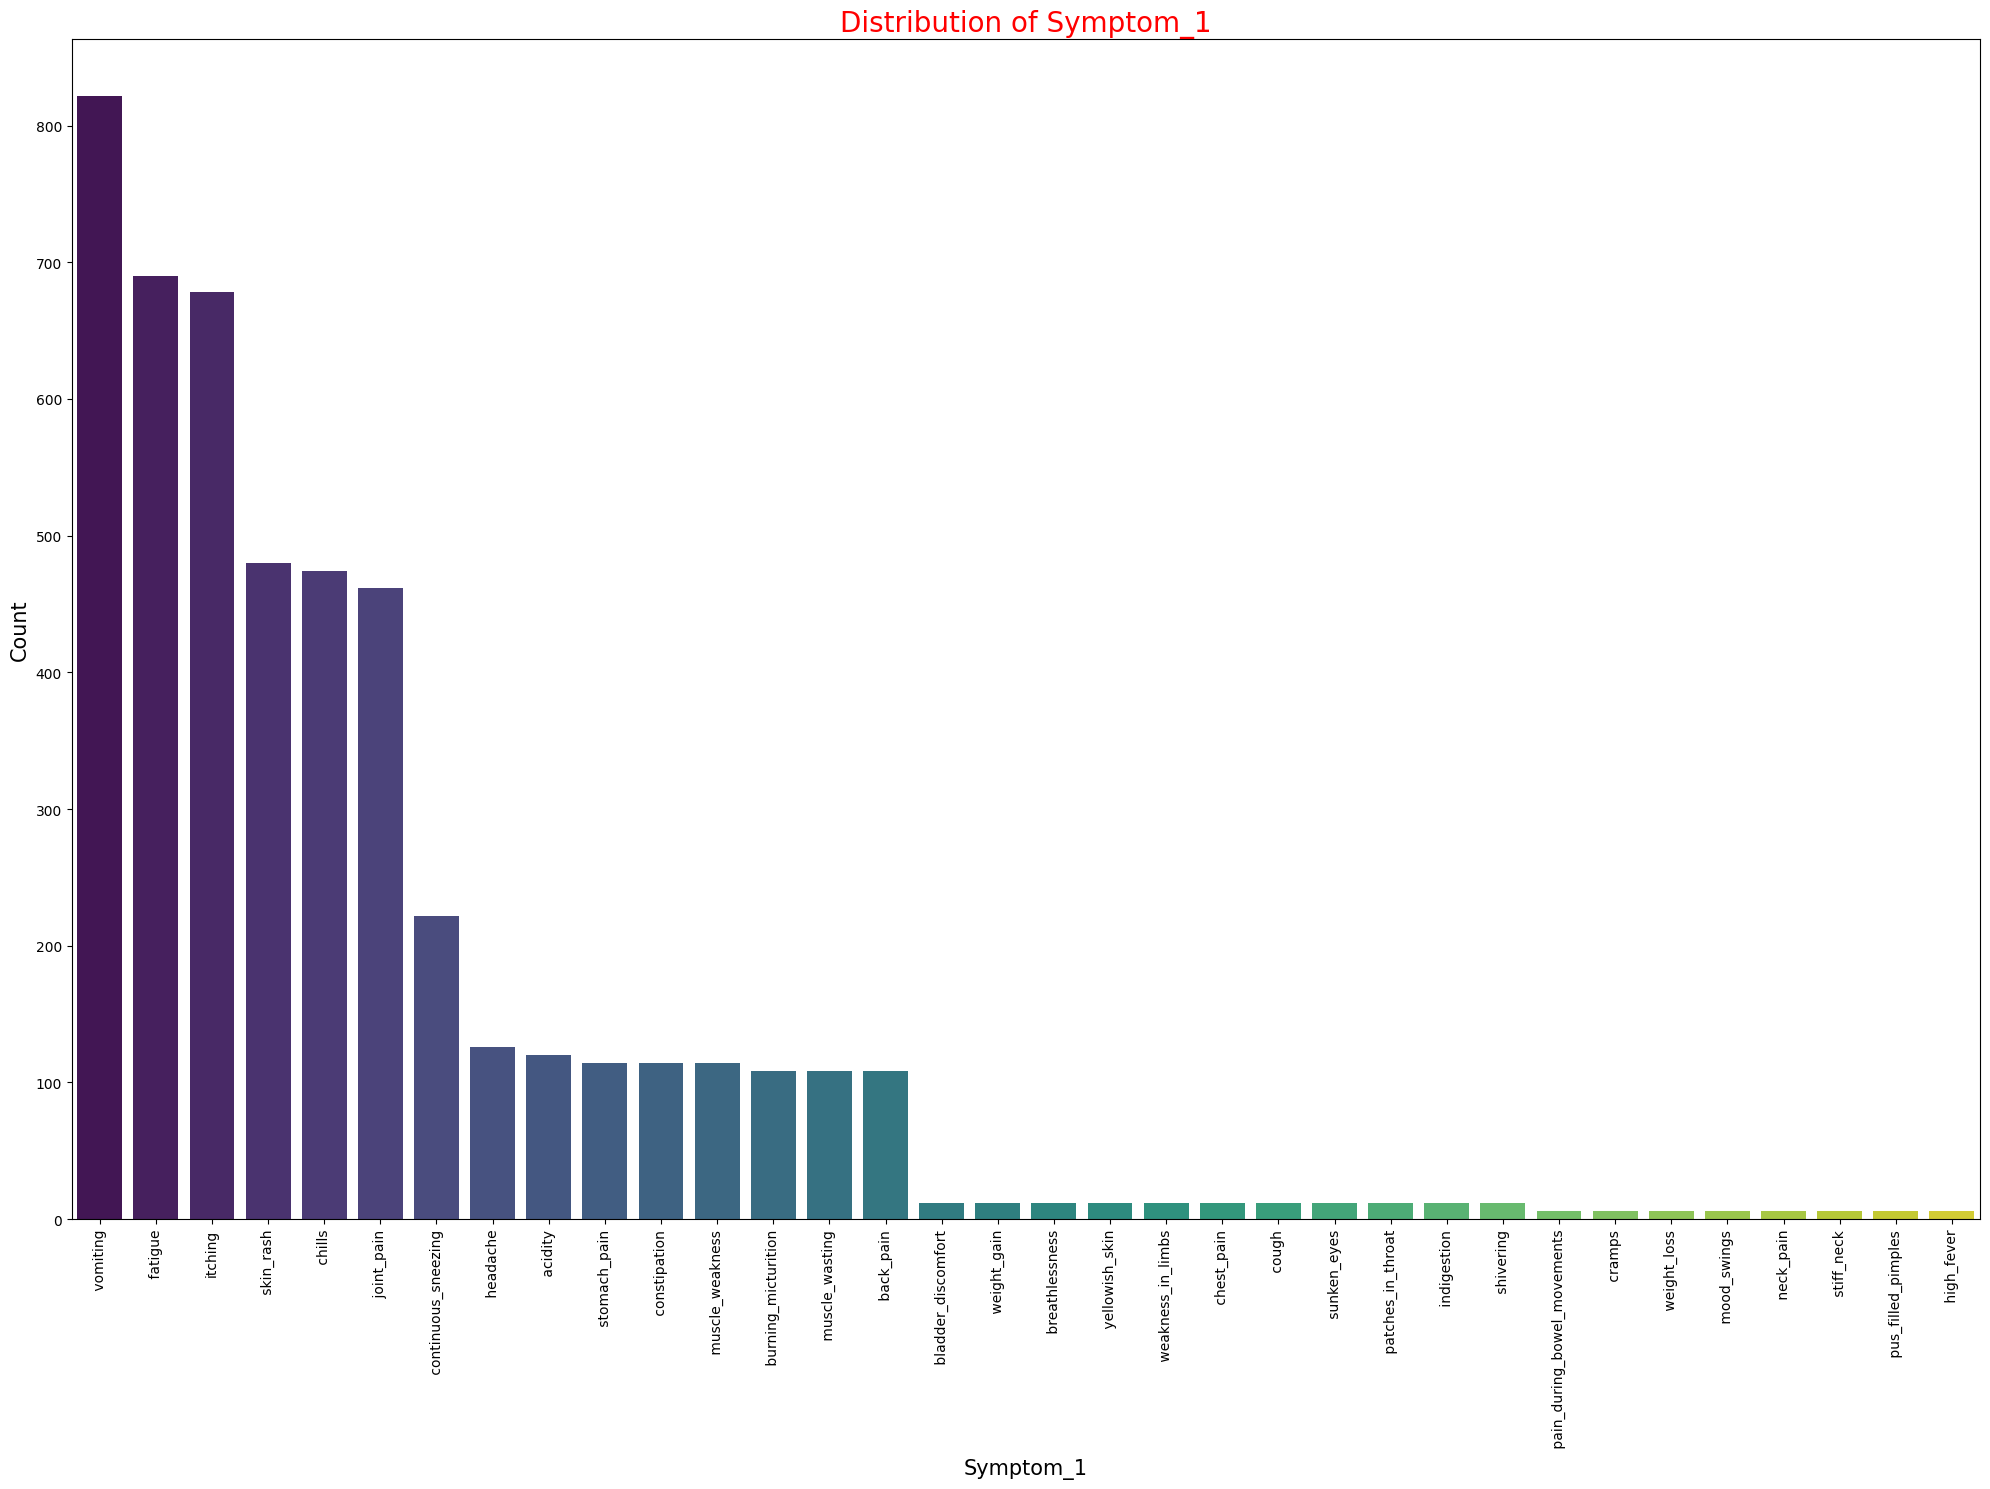

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.countplot(x="Symptom_1", data=df, order=df["Symptom_1"].value_counts().index, palette="viridis")
plt.title("Distribution of Symptom_1", fontsize=20, color="red")
plt.xlabel("Symptom_1", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-24-a84db0d959e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_2', data=df, palette="PiYG")  # Change to 'x' for horizontal


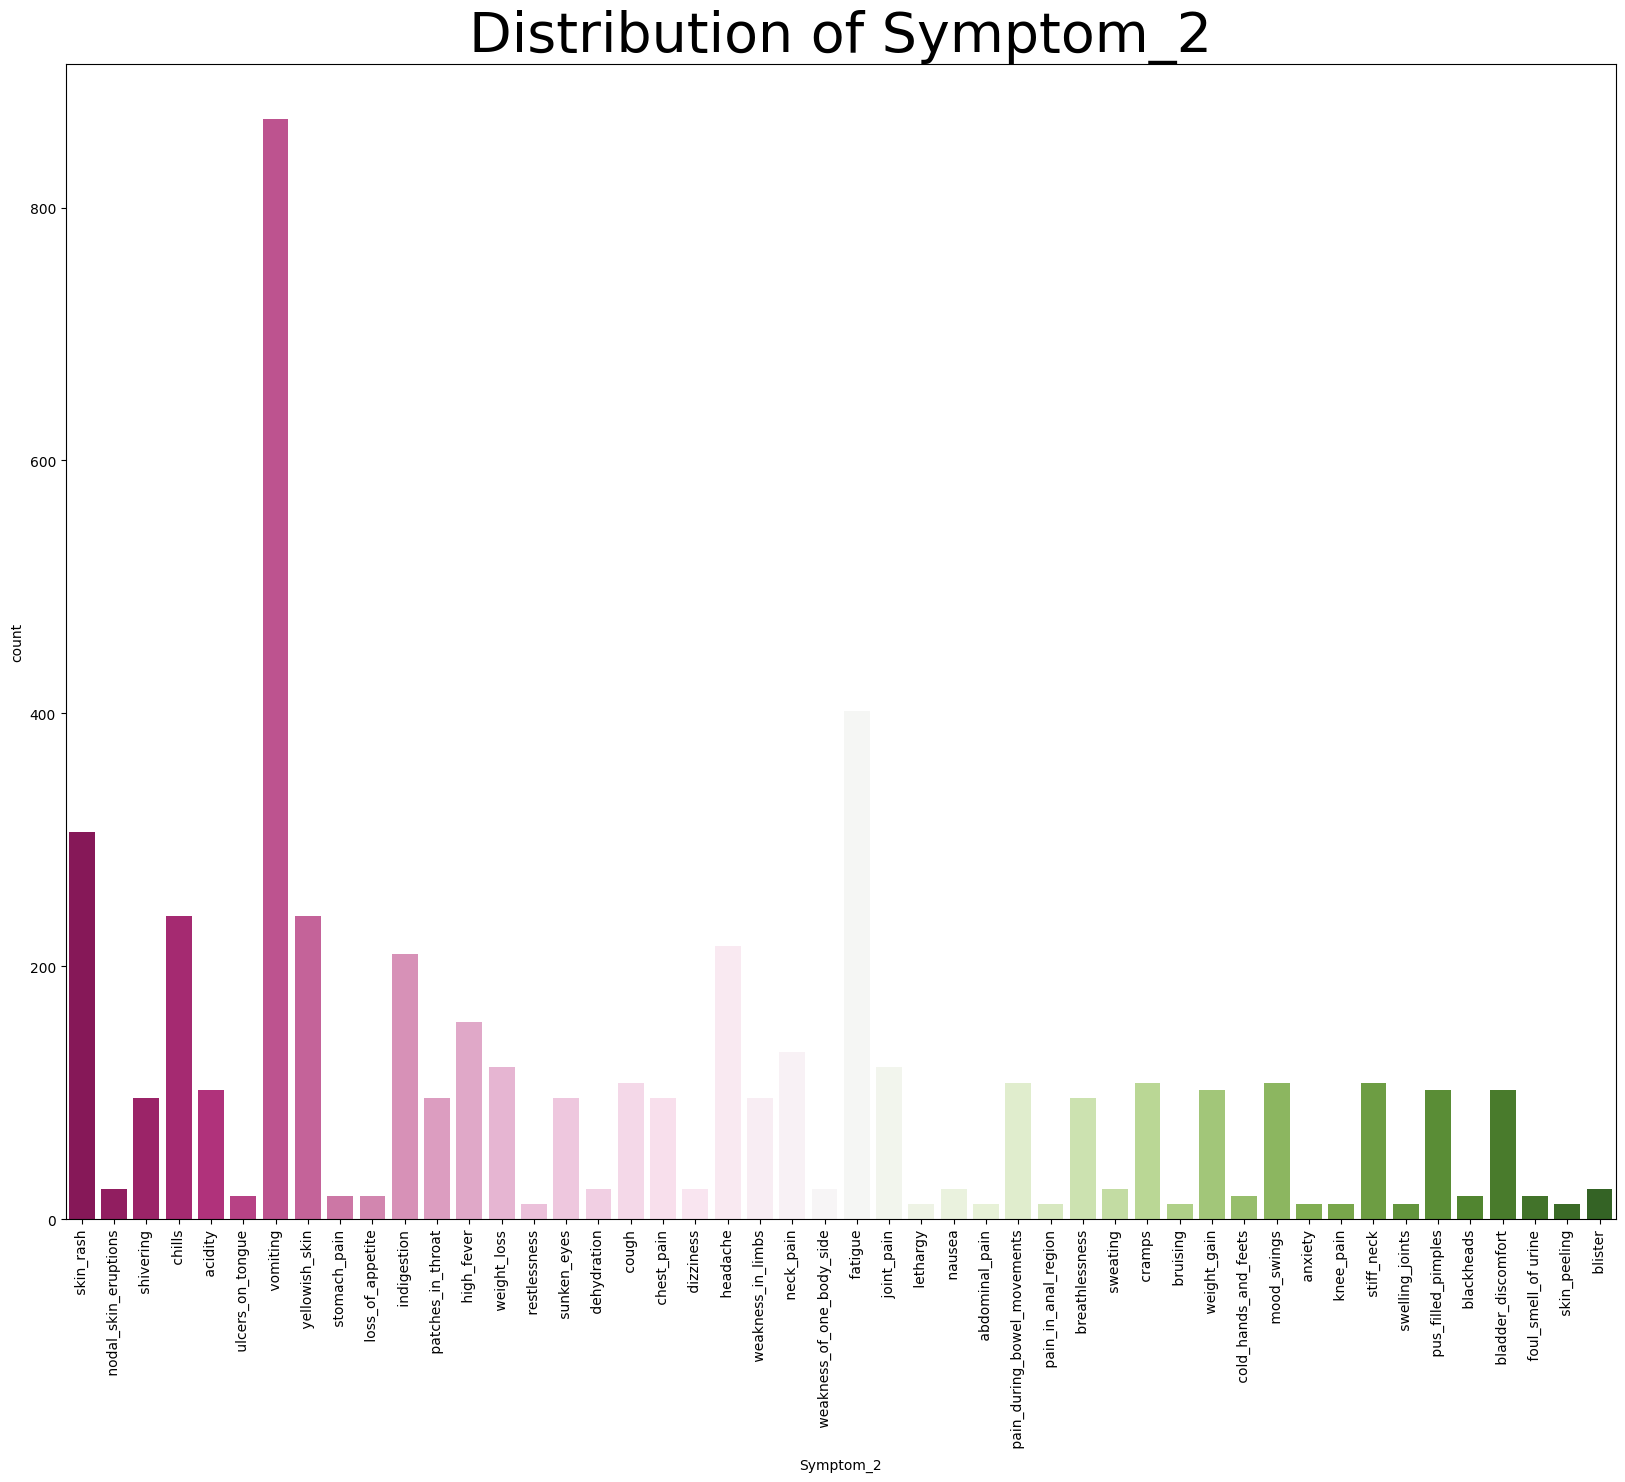

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_2', data=df, palette="PiYG")
plt.title("Distribution of Symptom_2", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-28-49d8120b9662>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_3', data=df, palette="PiYG")  # Change to 'x' for horizontal


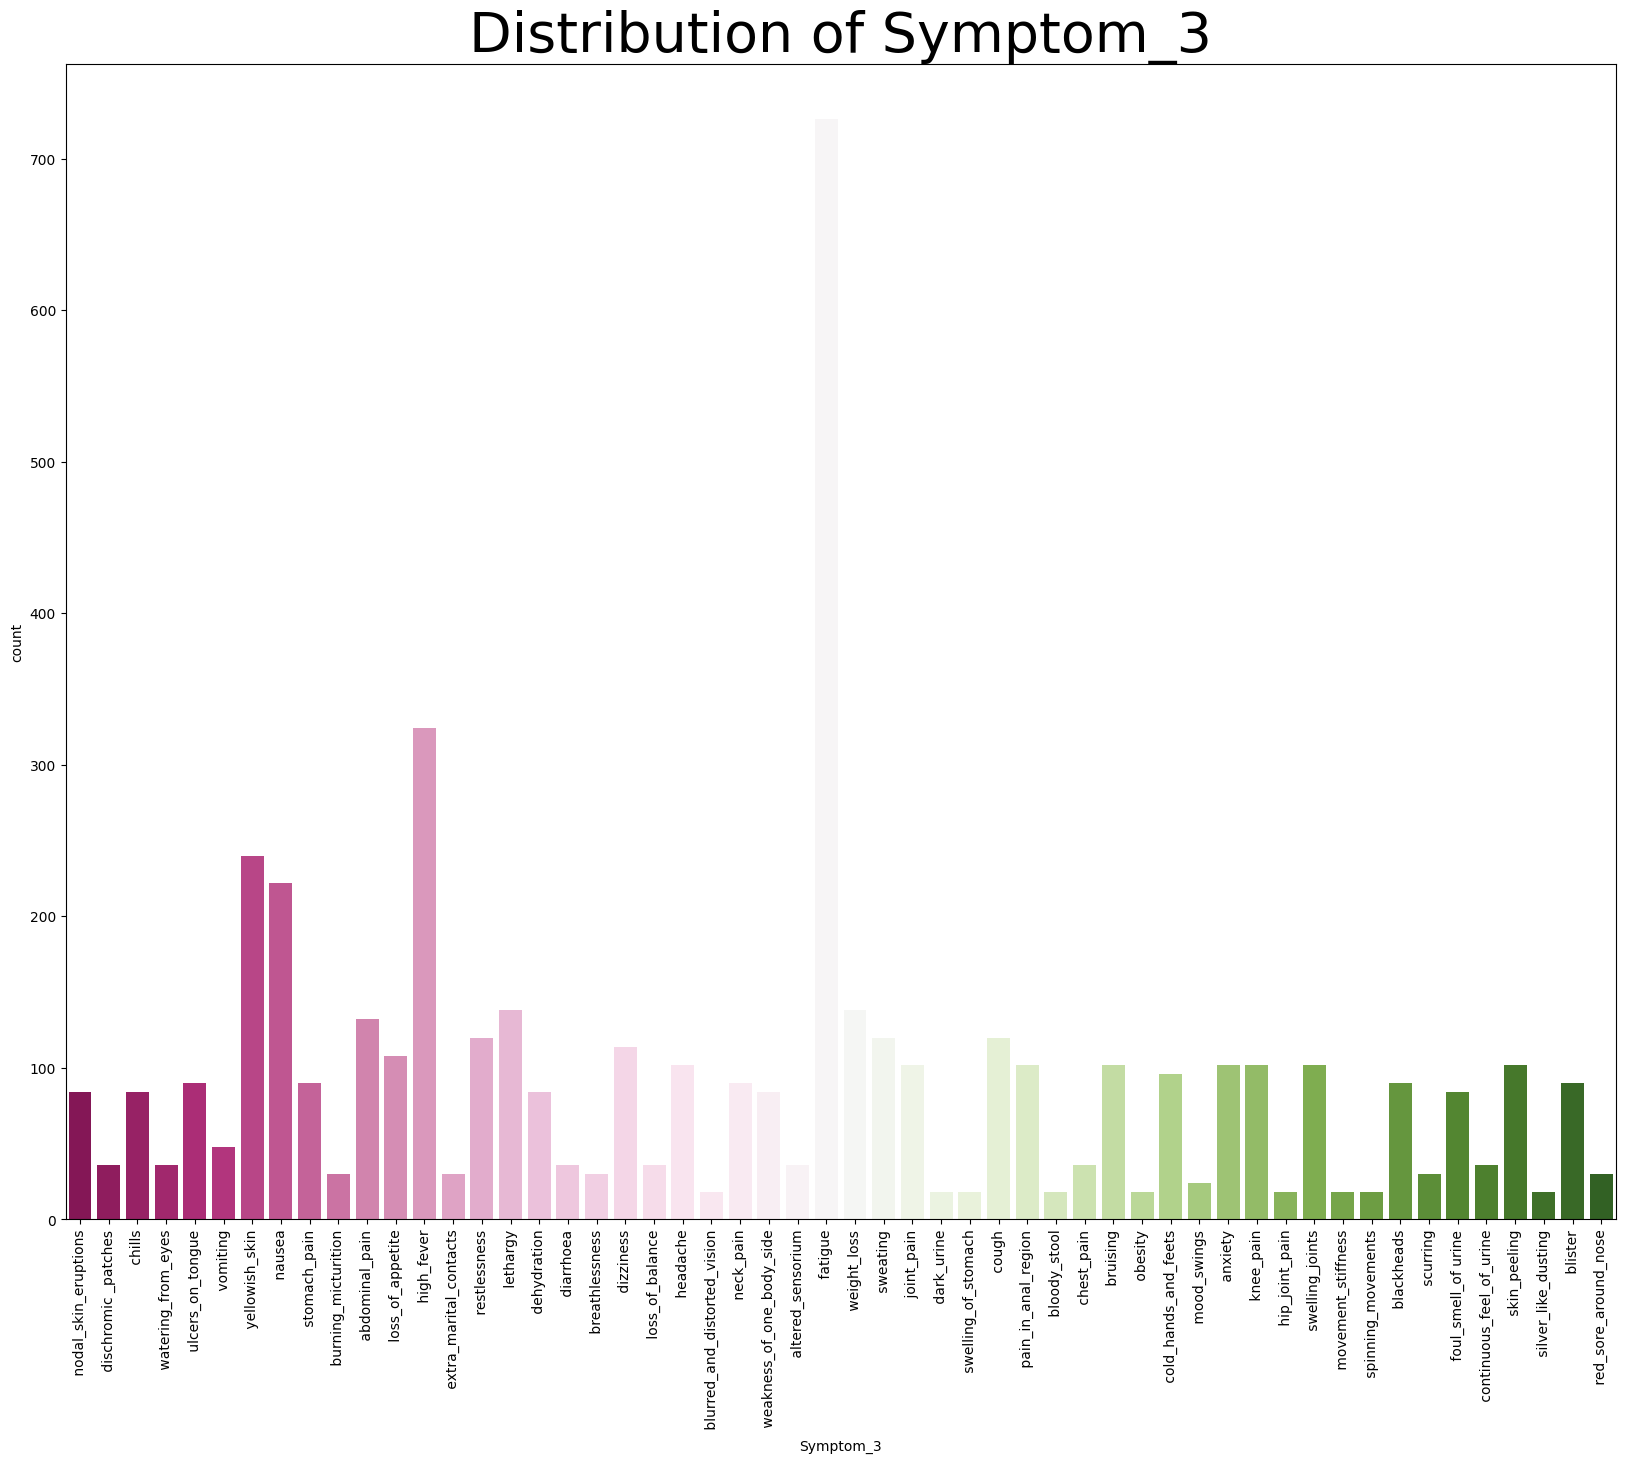

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_3', data=df, palette="PiYG")
plt.title("Distribution of Symptom_3", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-30-04c8af896f5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_4', data=df, palette="viridis")  # Change to a different palette


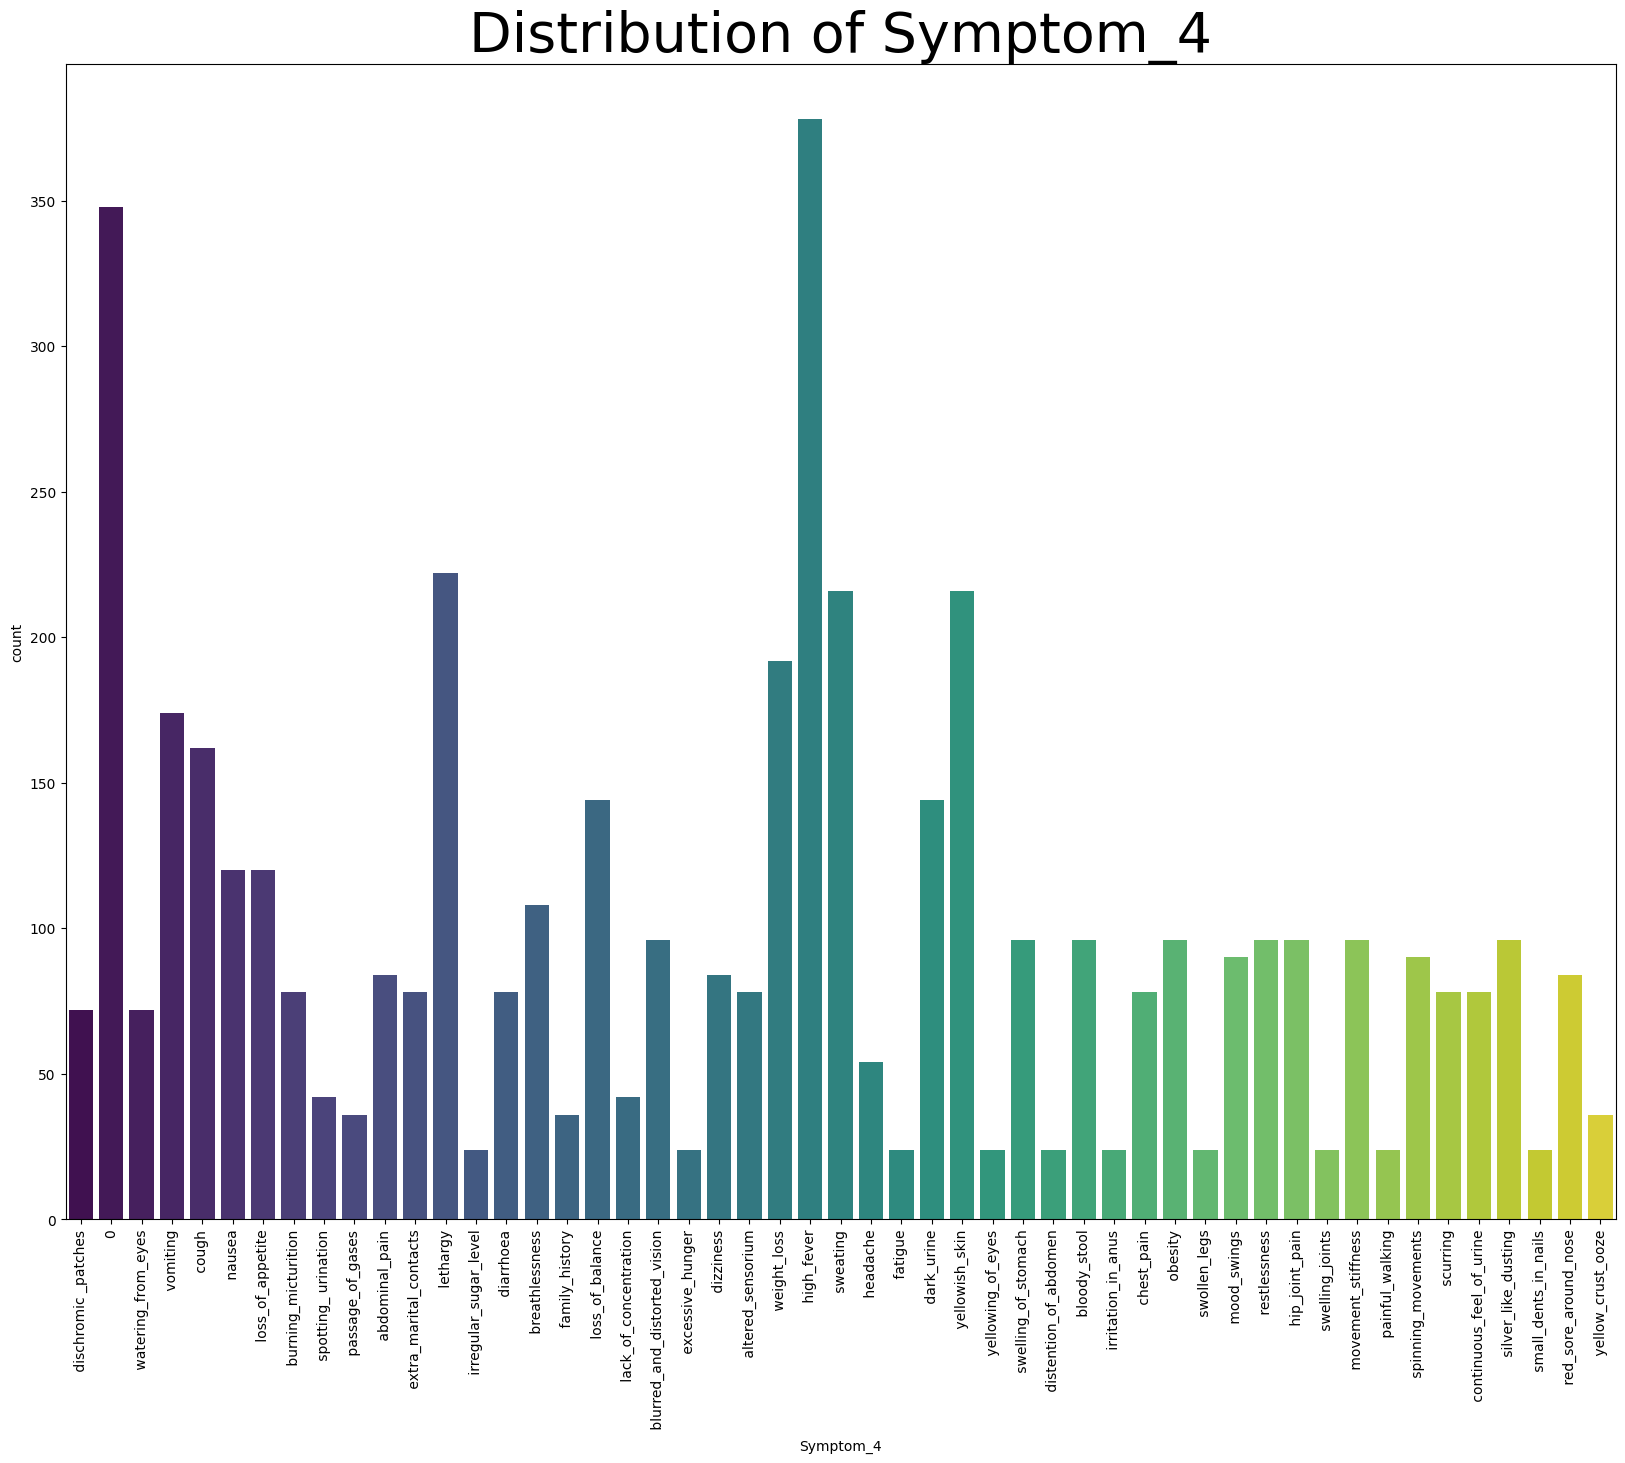

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_4', data=df, palette="viridis")
plt.title("Distribution of Symptom_4", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-32-d47a51685010>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_5', data=df, palette="Blues")  # Change to "Blues" palette


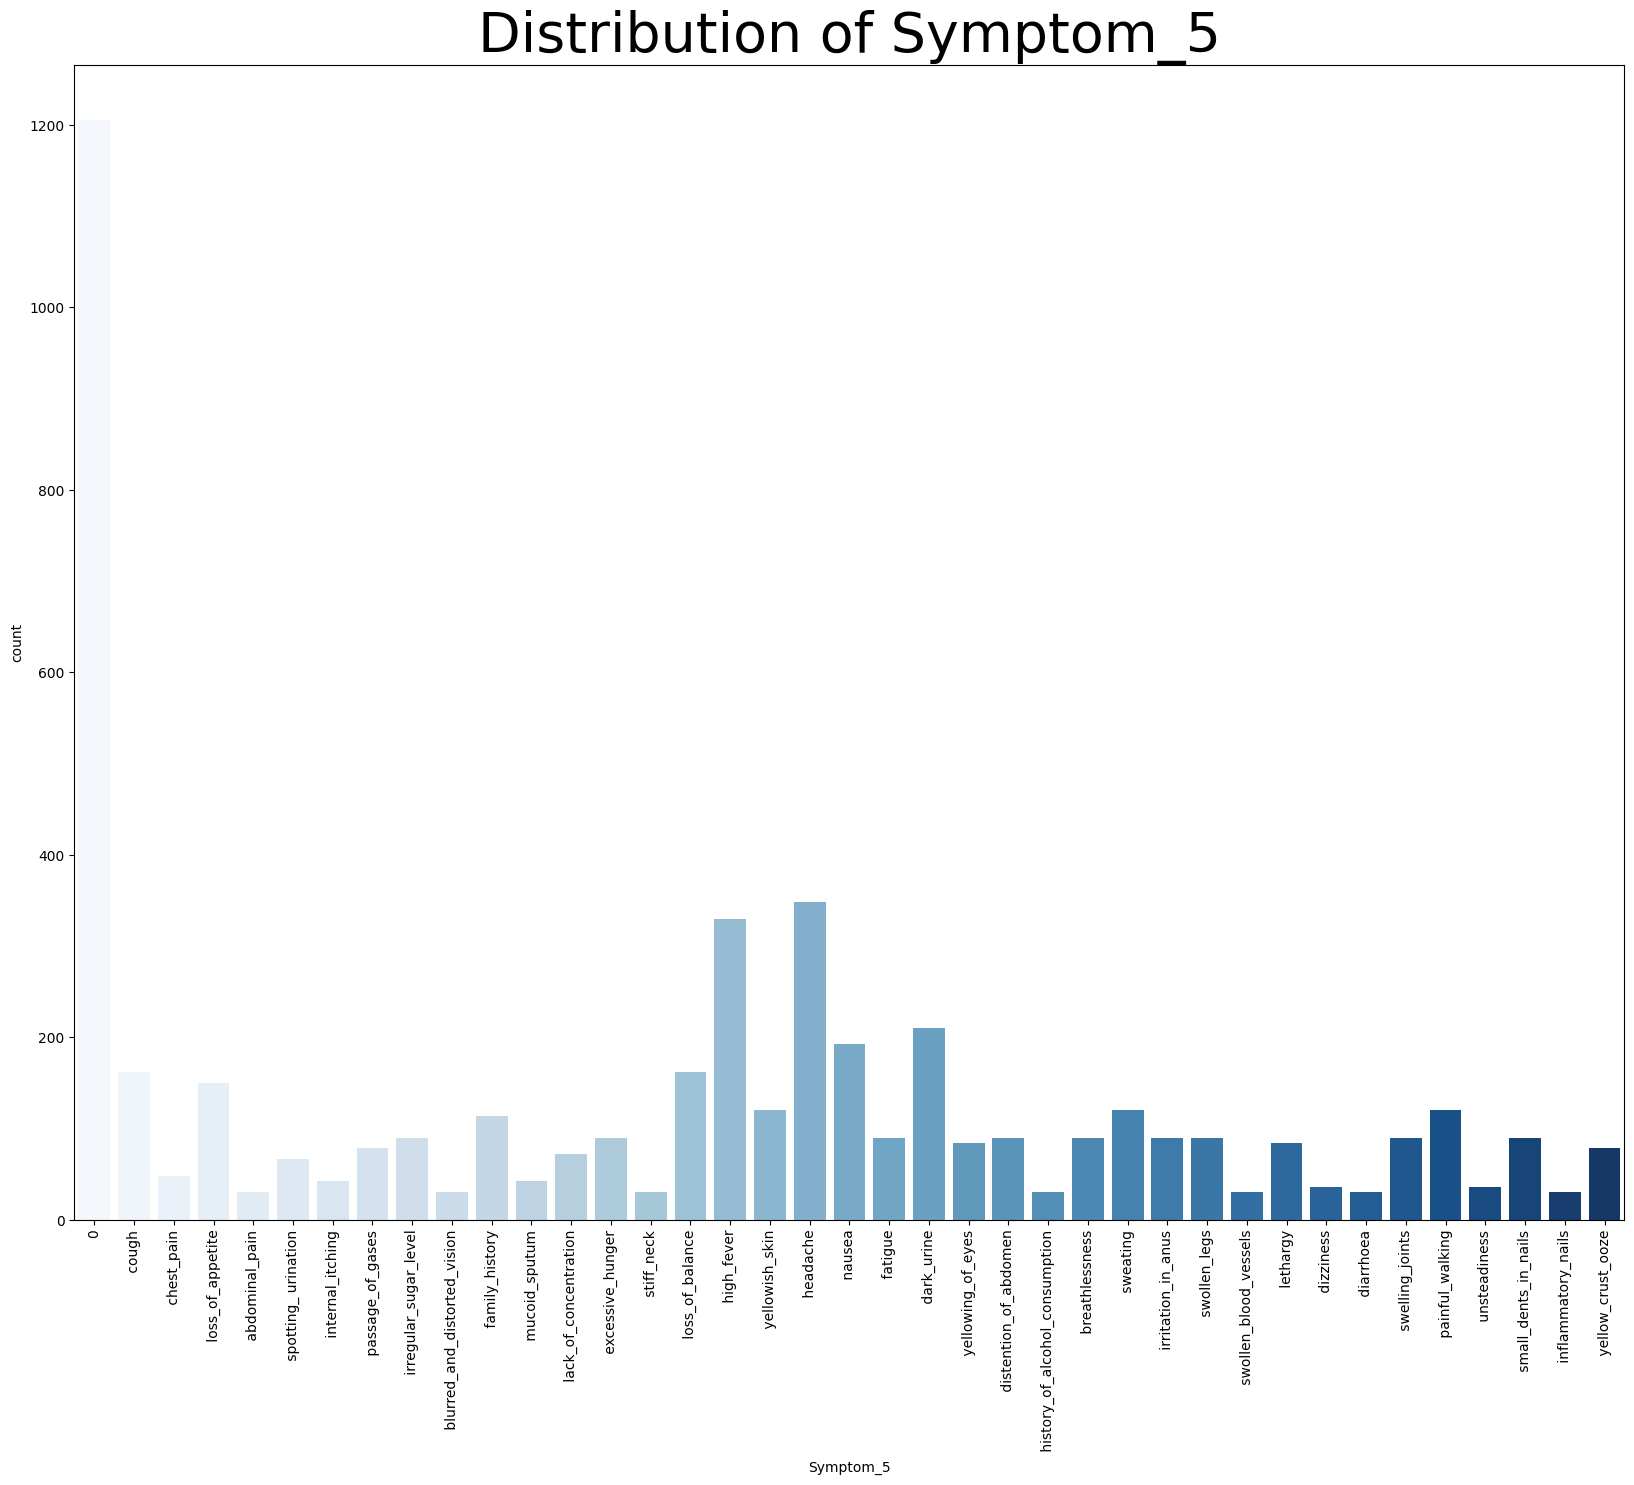

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_5', data=df, palette="Blues")
plt.title("Distribution of Symptom_5", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-33-d13b95e68a8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_6', data=df, palette="Blues")  # Change to "Blues" palette


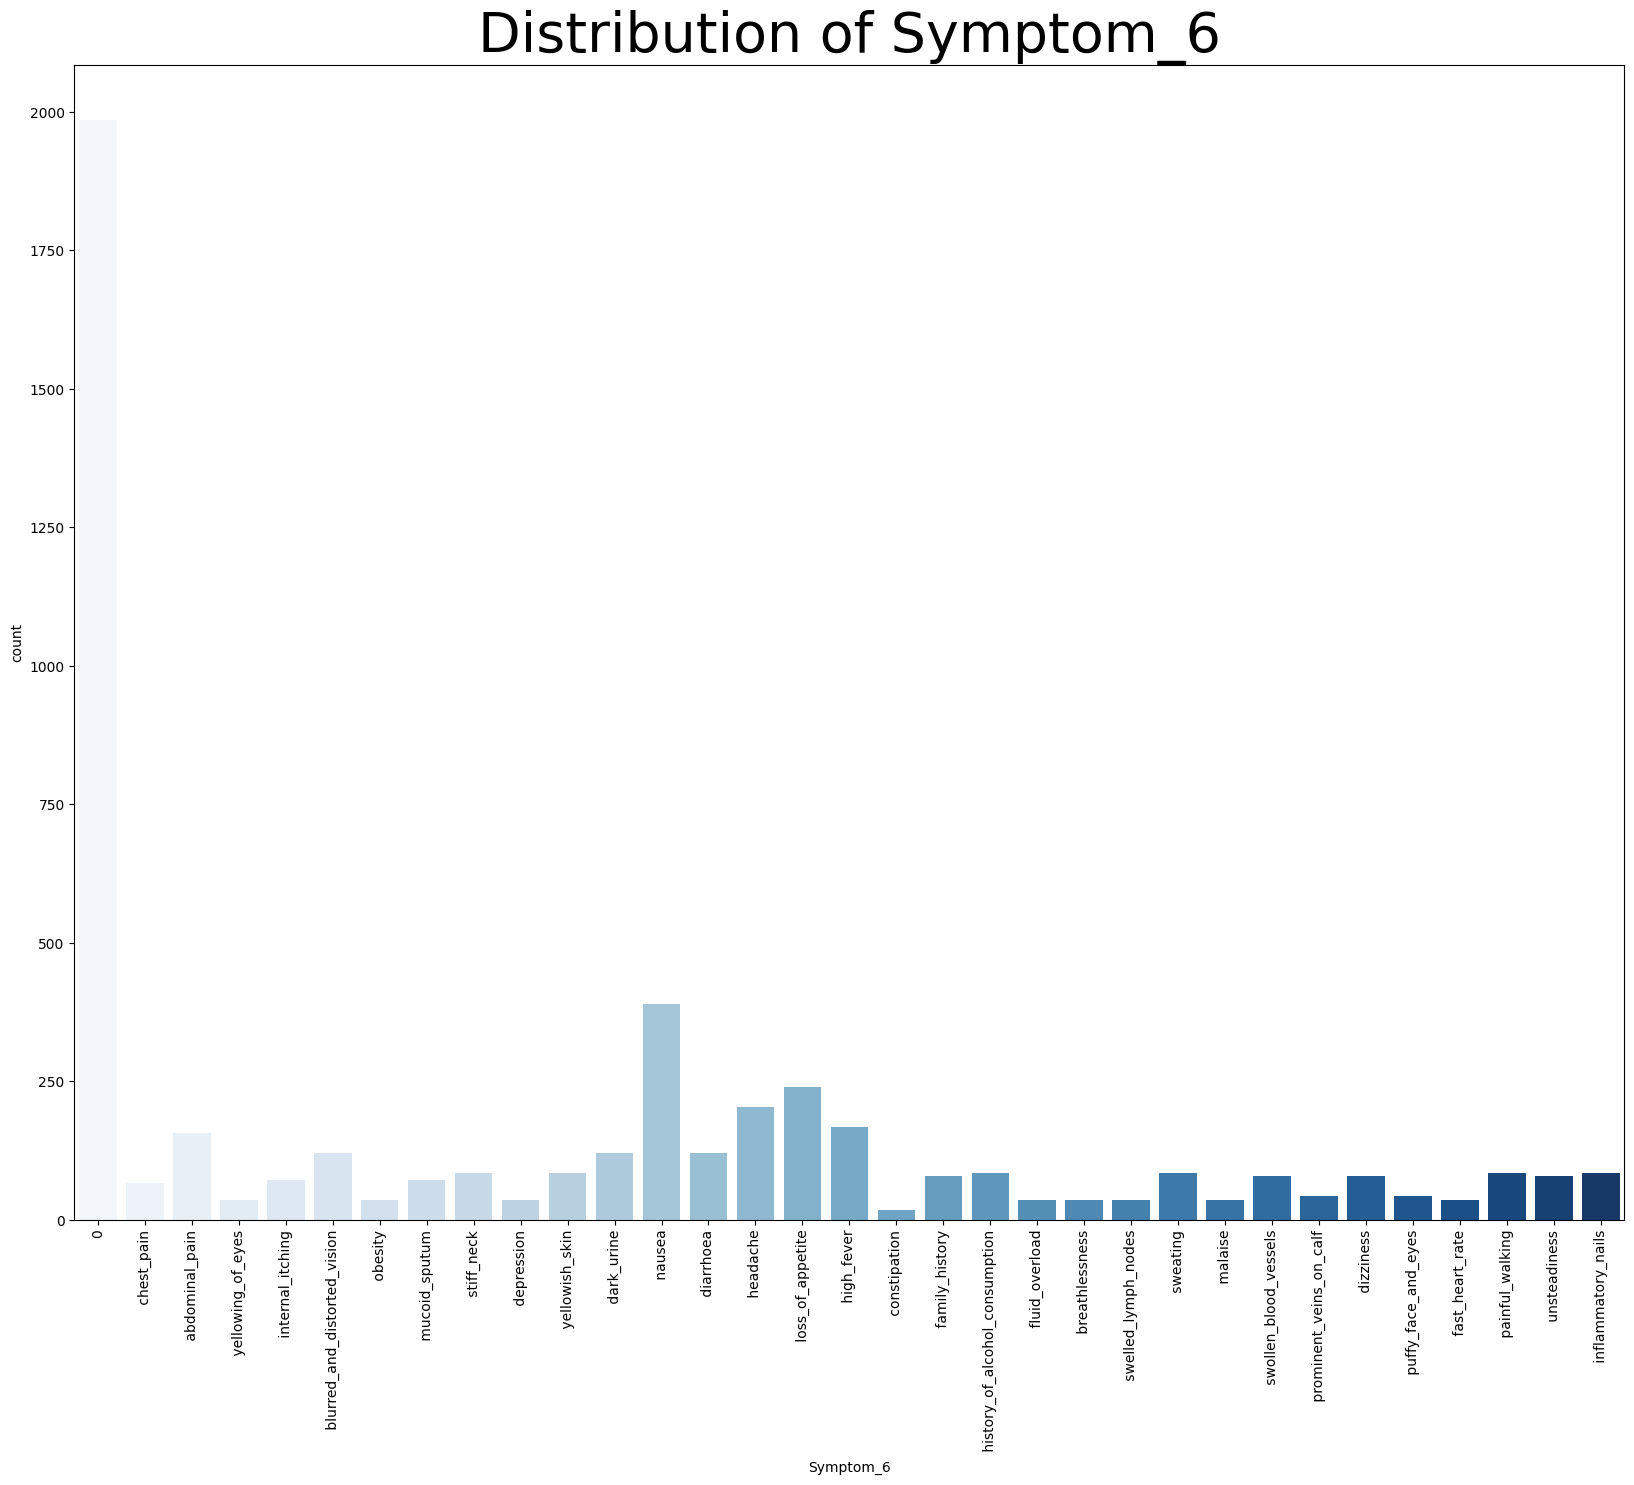

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_6', data=df, palette="Blues")
plt.title("Distribution of Symptom_6", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-cbfa5ad9fd6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_7', data=df, palette="Greens")  # Change to "Greens" palette


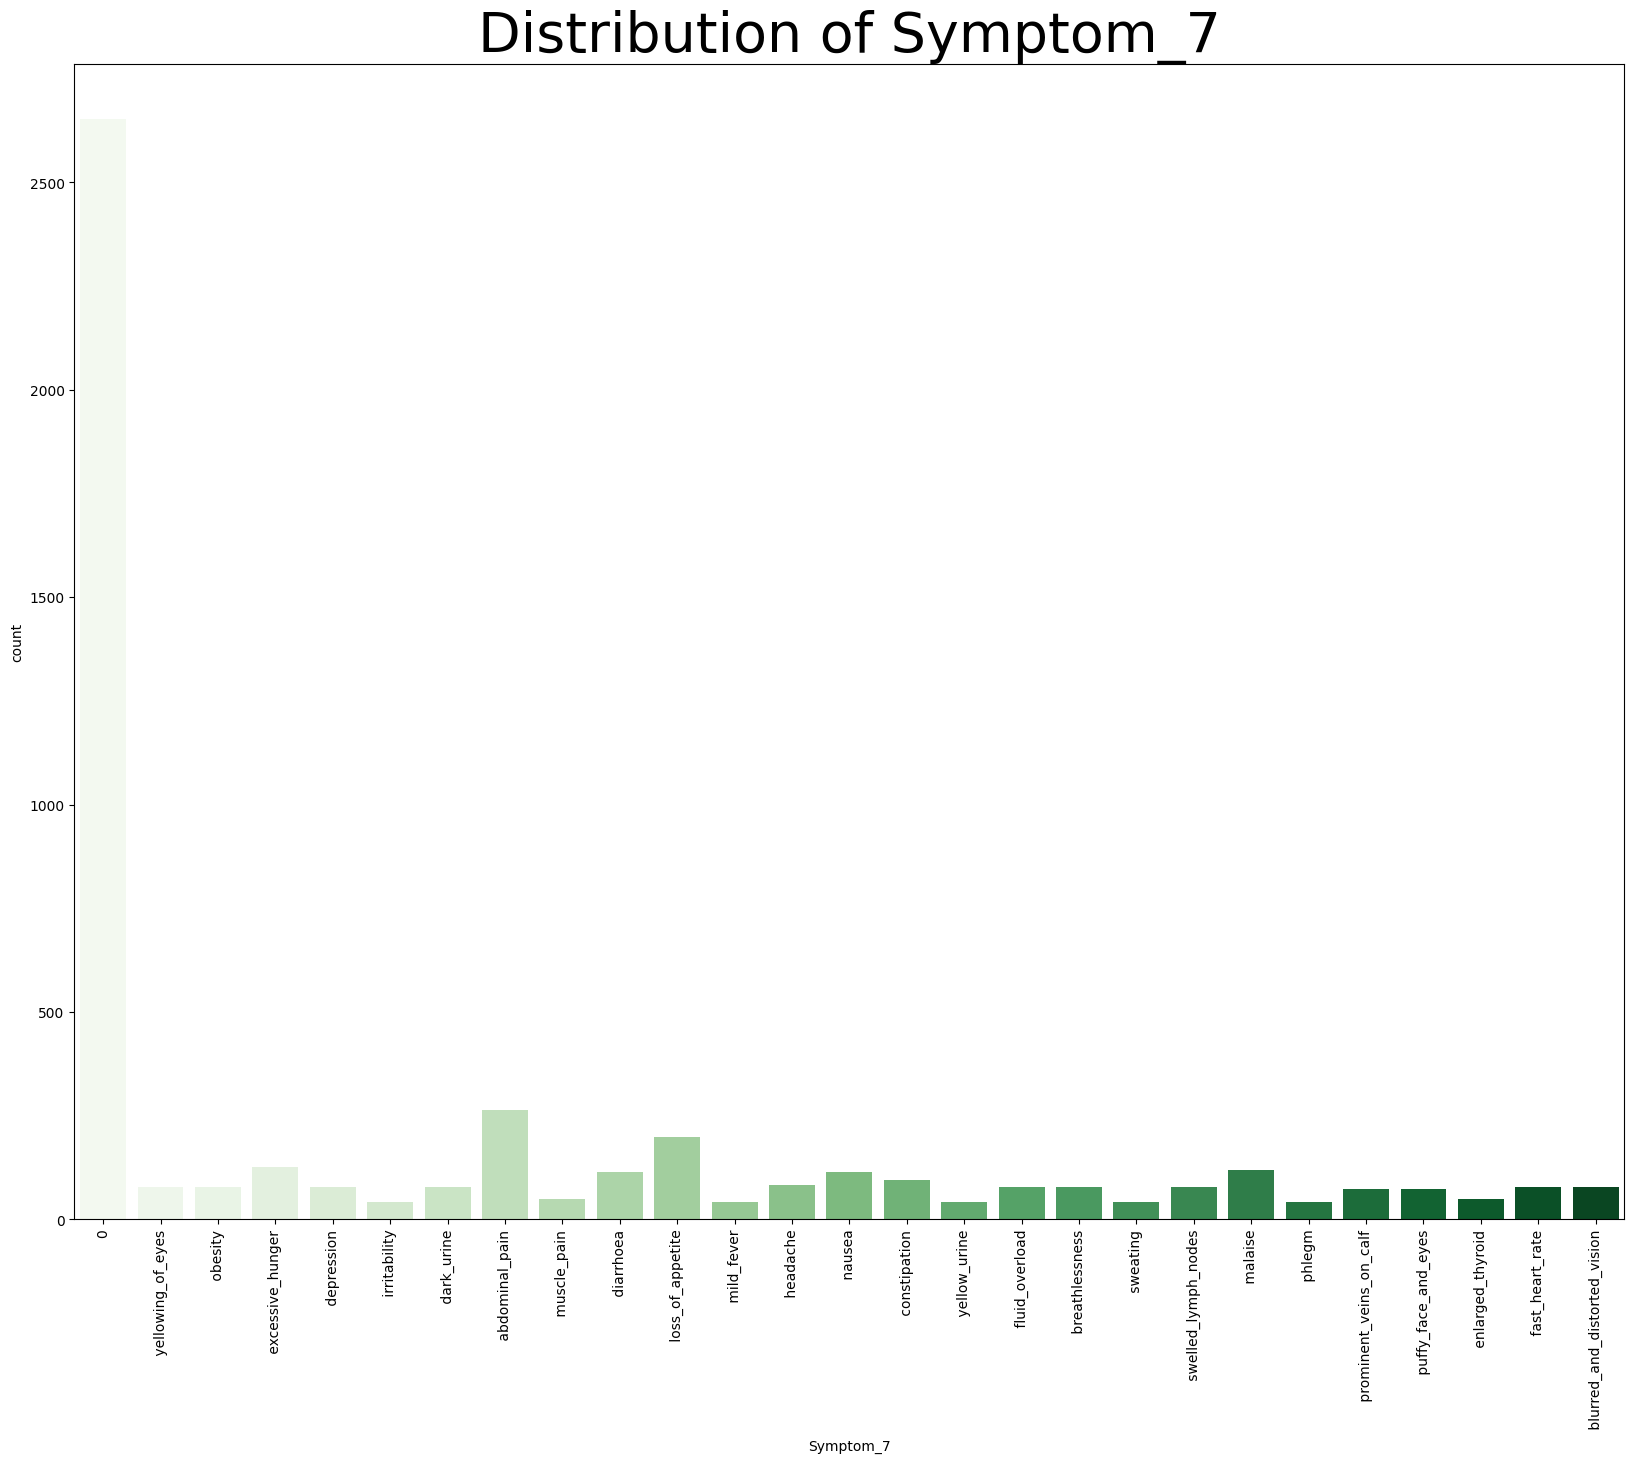

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_7', data=df, palette="Greens")
plt.title("Distribution of Symptom_7", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-35-65be87718d76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_8', data=df, palette="Greens")  # Change to "Greens" palette


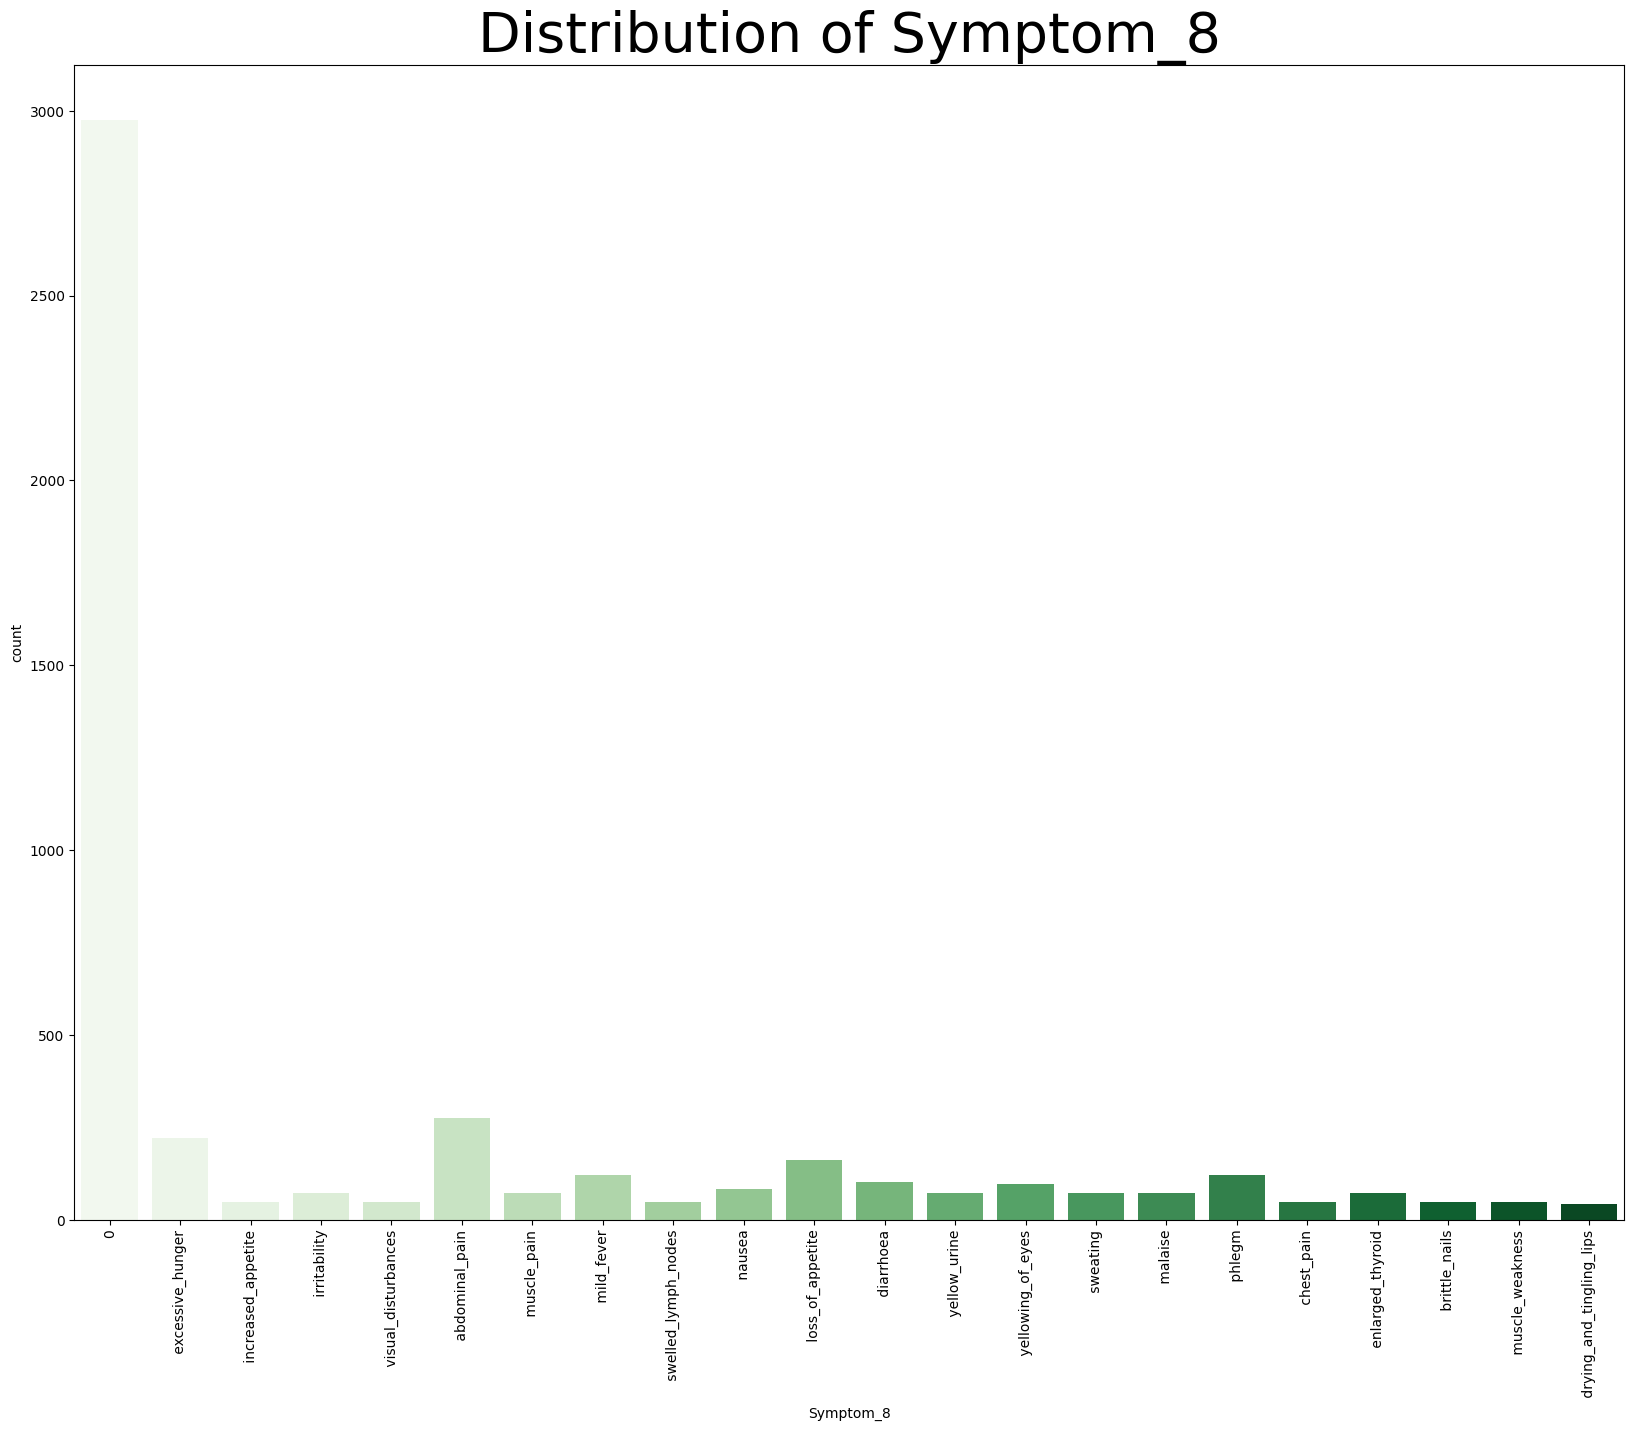

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_8', data=df, palette="Greens")
plt.title("Distribution of Symptom_8", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-36-c63dedf20784>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_9', data=df, palette="Greens")  # Change to "Greens" palette


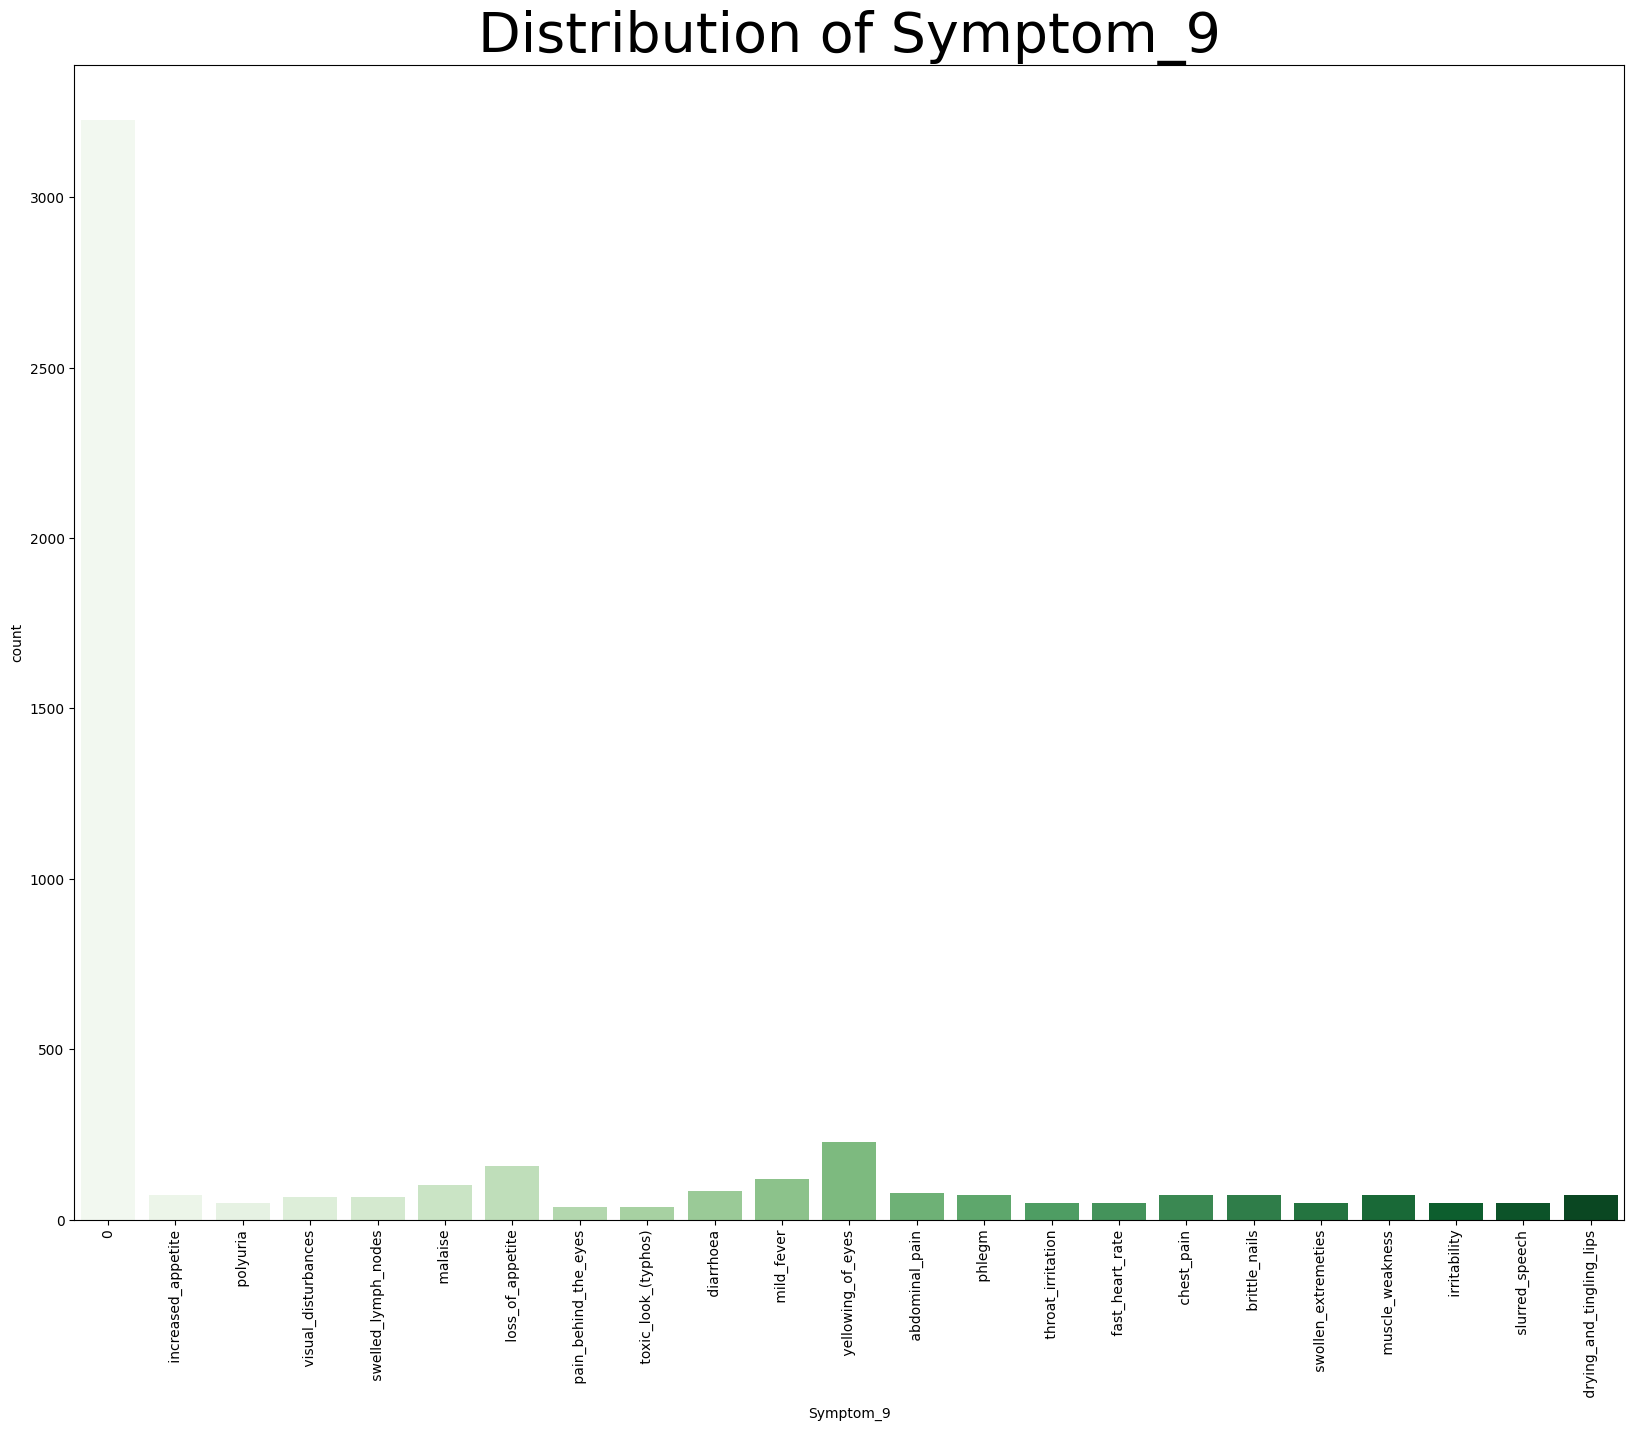

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_9', data=df, palette="Greens")
plt.title("Distribution of Symptom_9", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-37-96387e1f2933>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_10', data=df, palette="Greens_d")  # Use "Greens_d" for darker shades


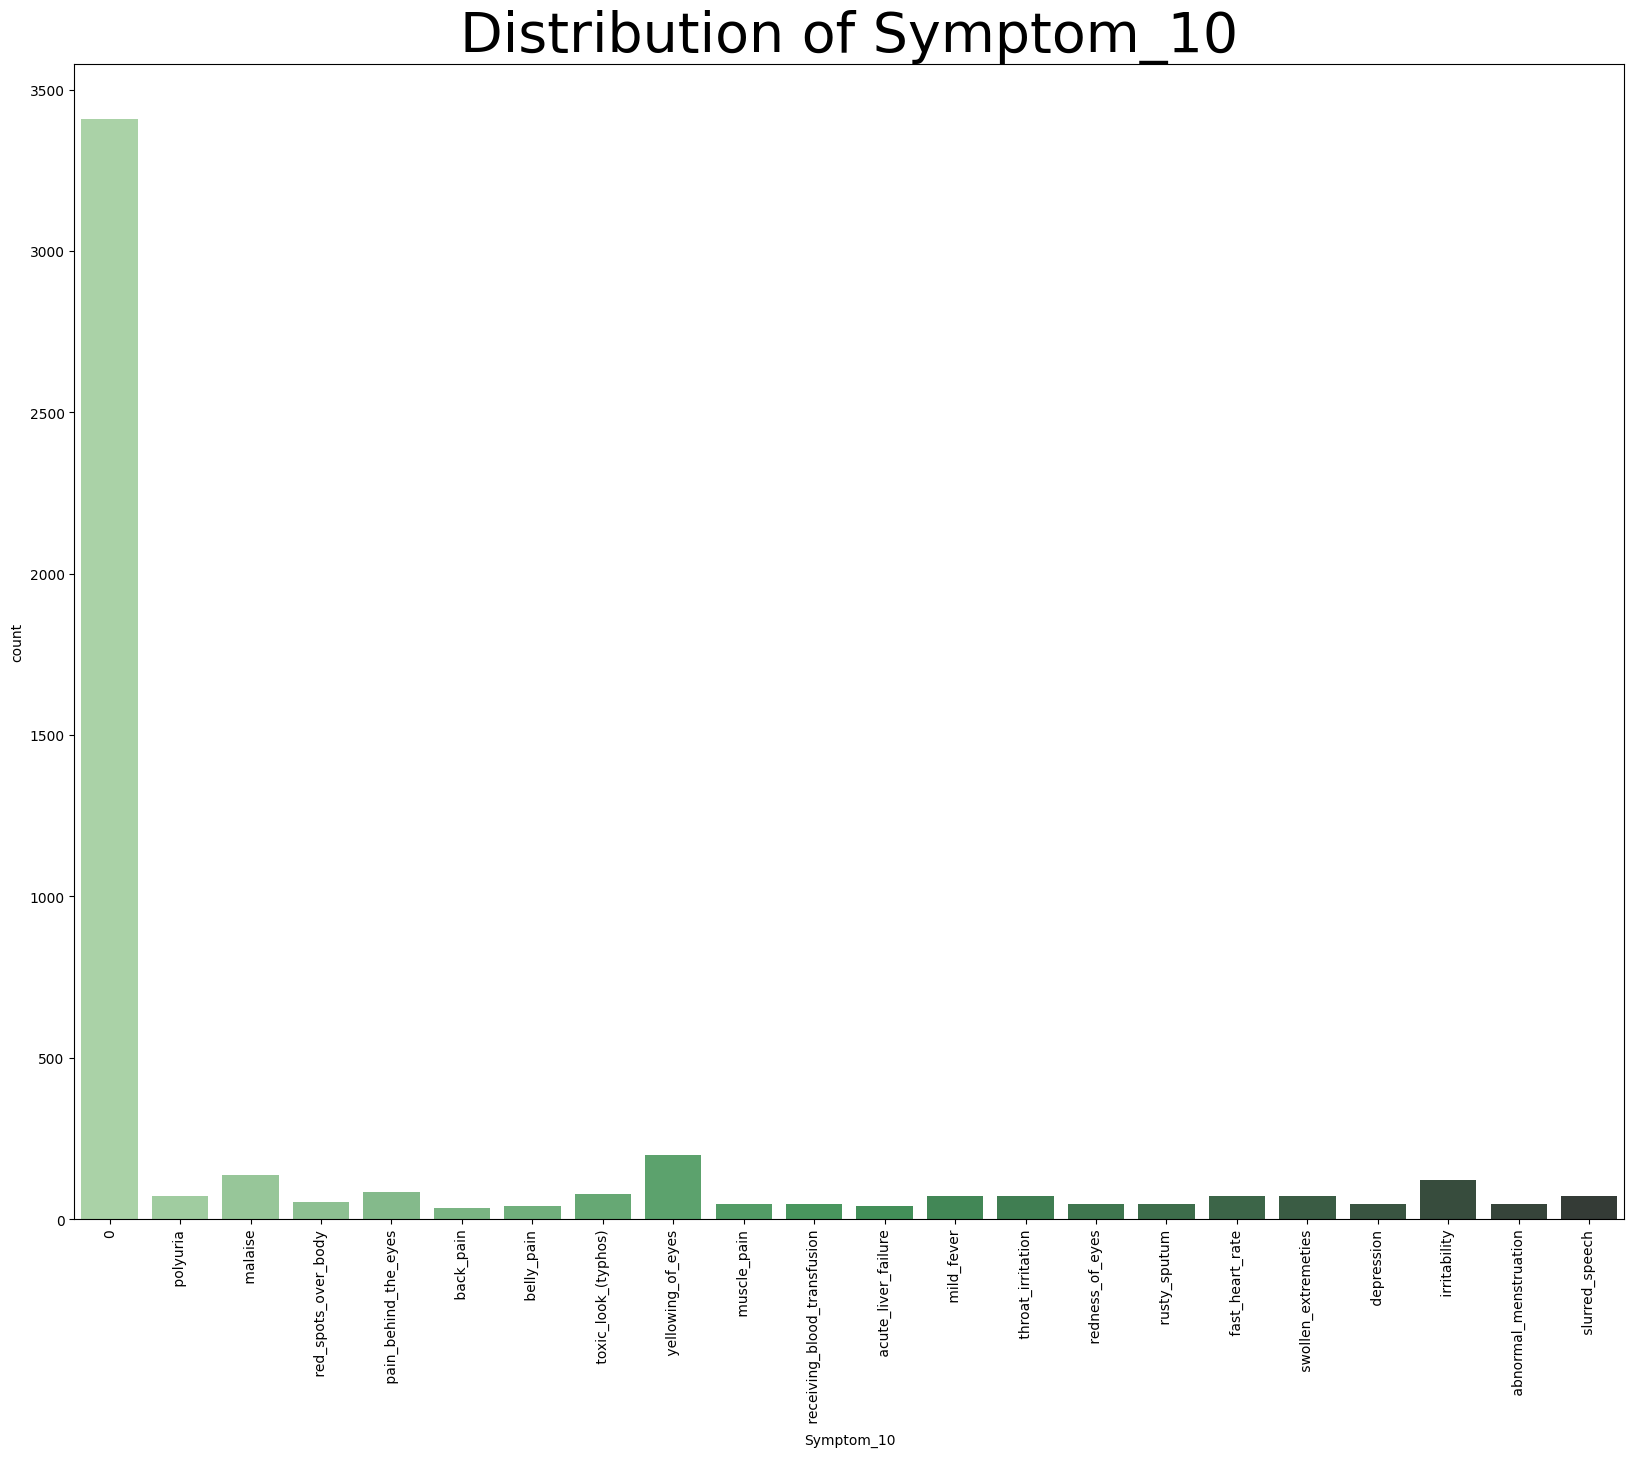

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_10', data=df, palette="Greens_d")
plt.title("Distribution of Symptom_10", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-38-33d171e5aad3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_11', data=df, palette="Oranges_d")  # Change to "Oranges_d"


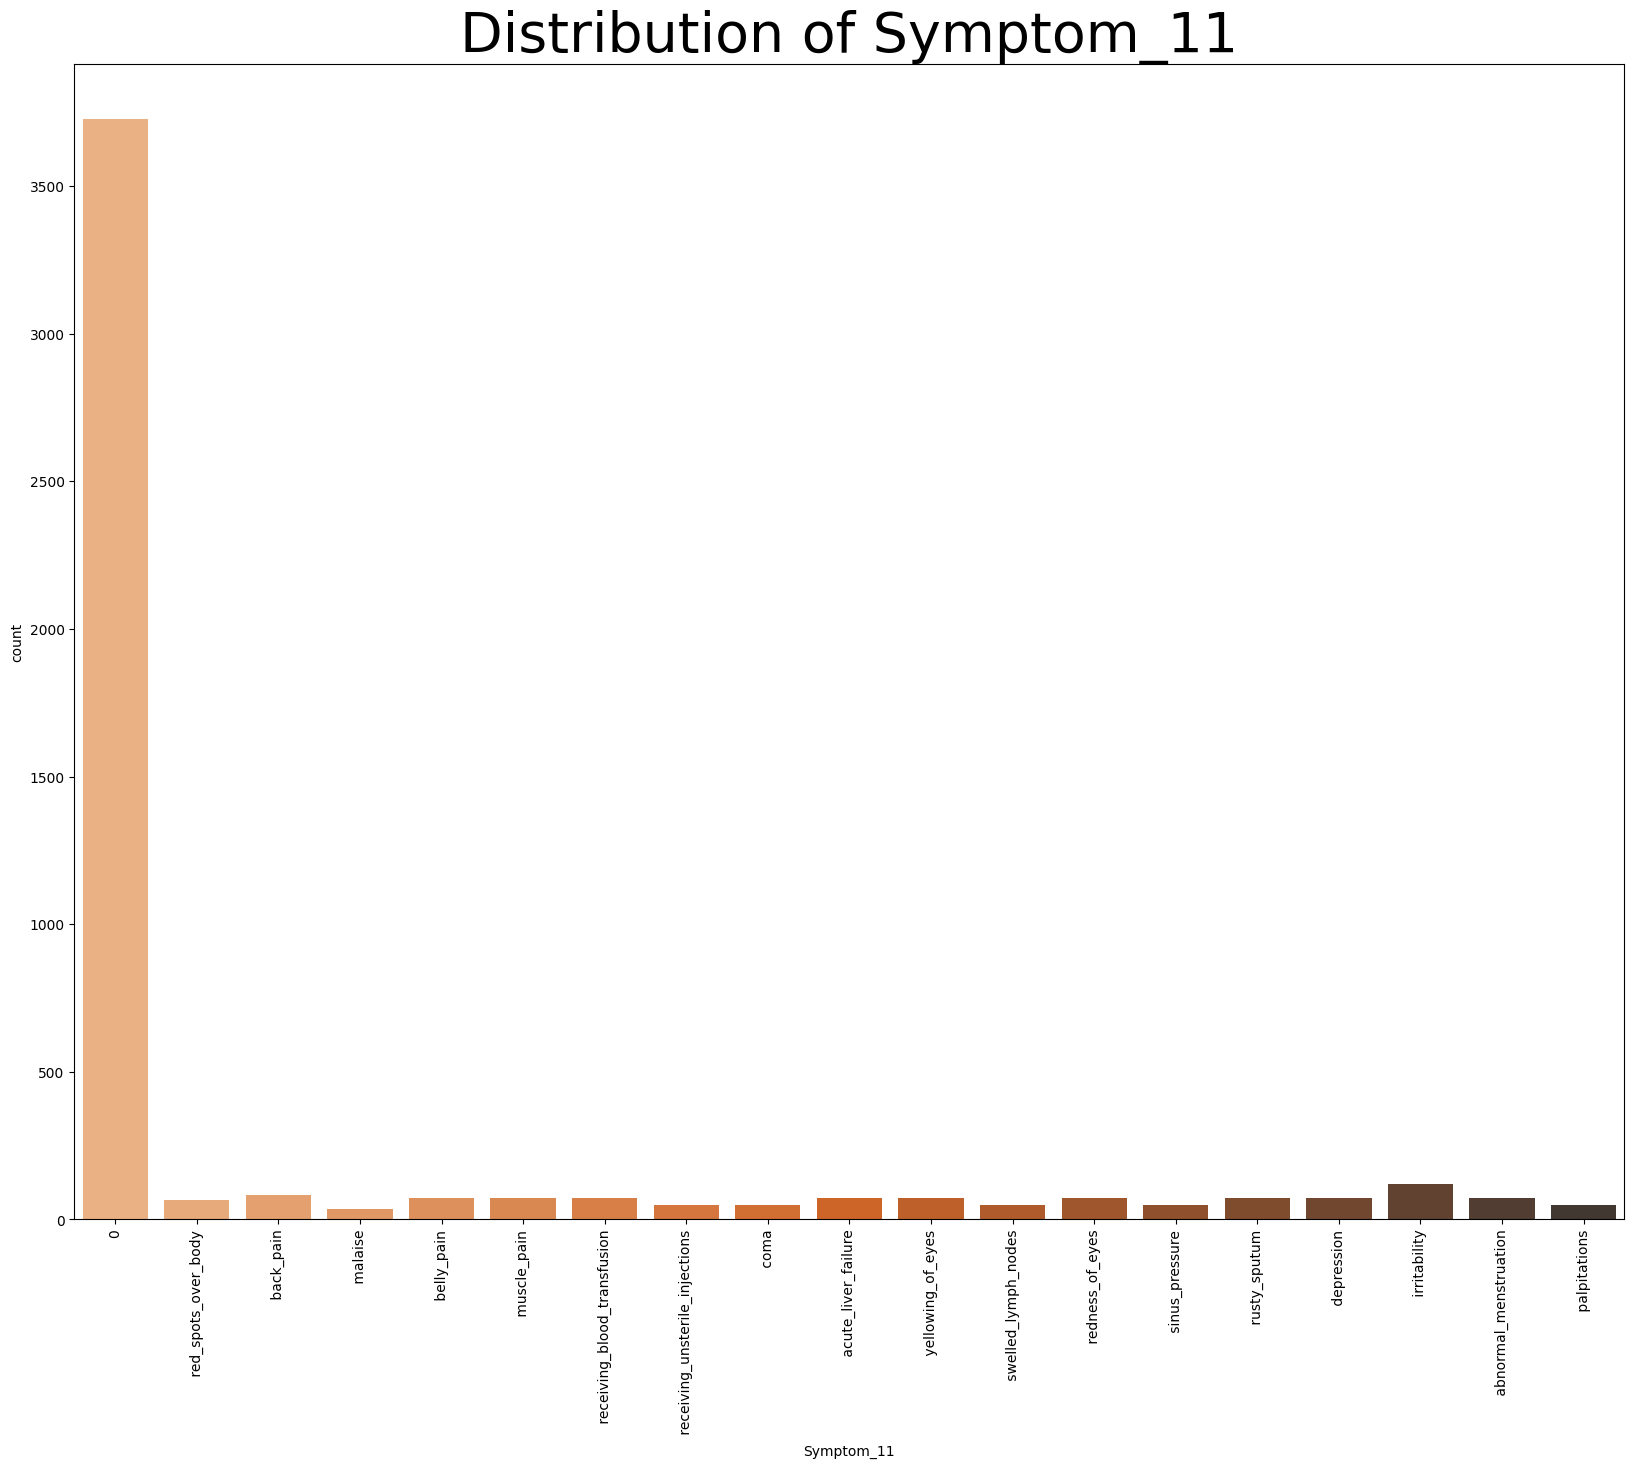

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_11', data=df, palette="Oranges_d")
plt.title("Distribution of Symptom_11", fontsize=40)
plt.xticks(rotation=90)
plt.show()

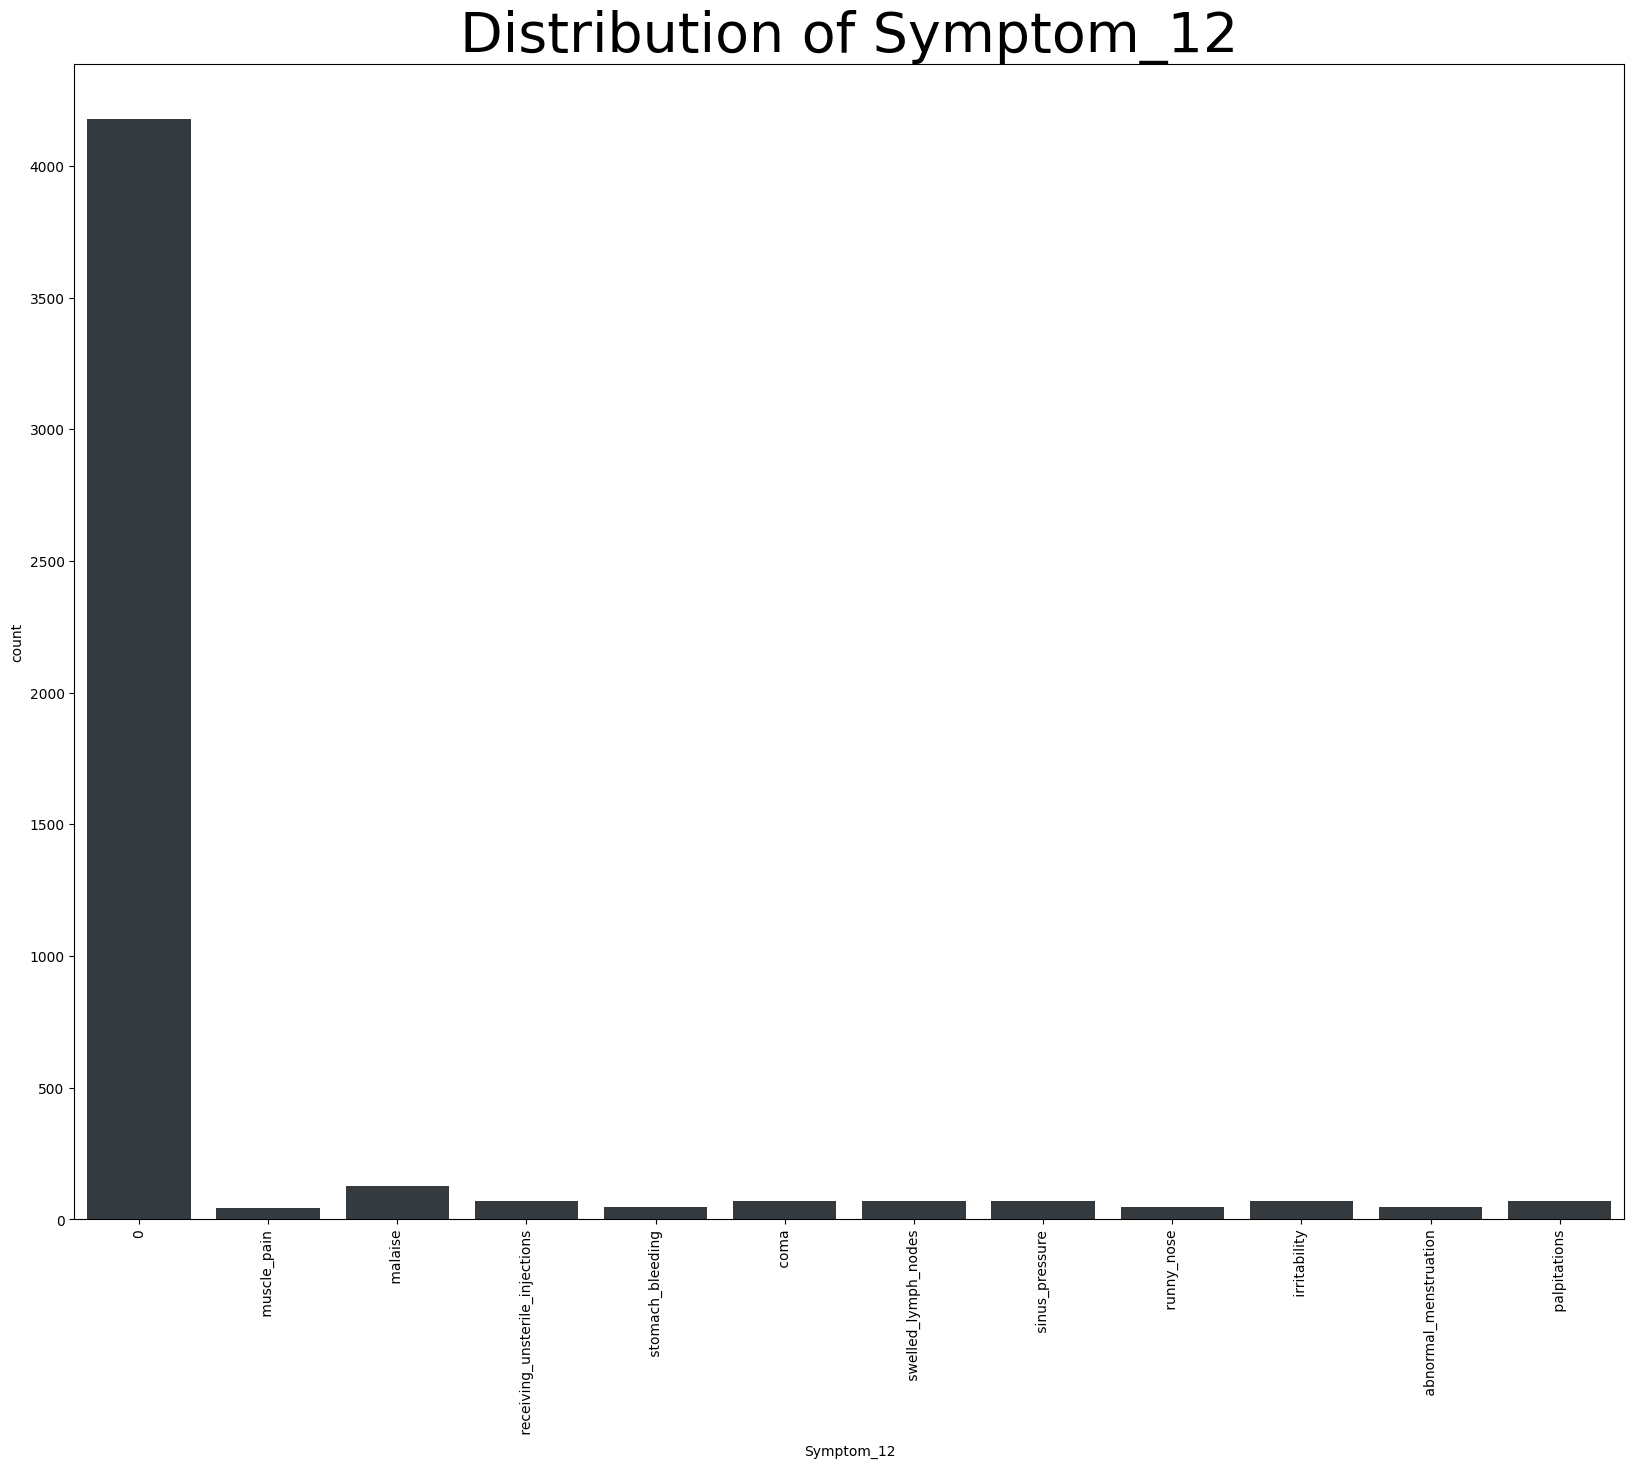

In [ ]:
plt.figure(figsize=(20, 15))
plt.title("Distribution of Symptom_12", fontsize=40)
plt.xticks(rotation=90)
plt.show()

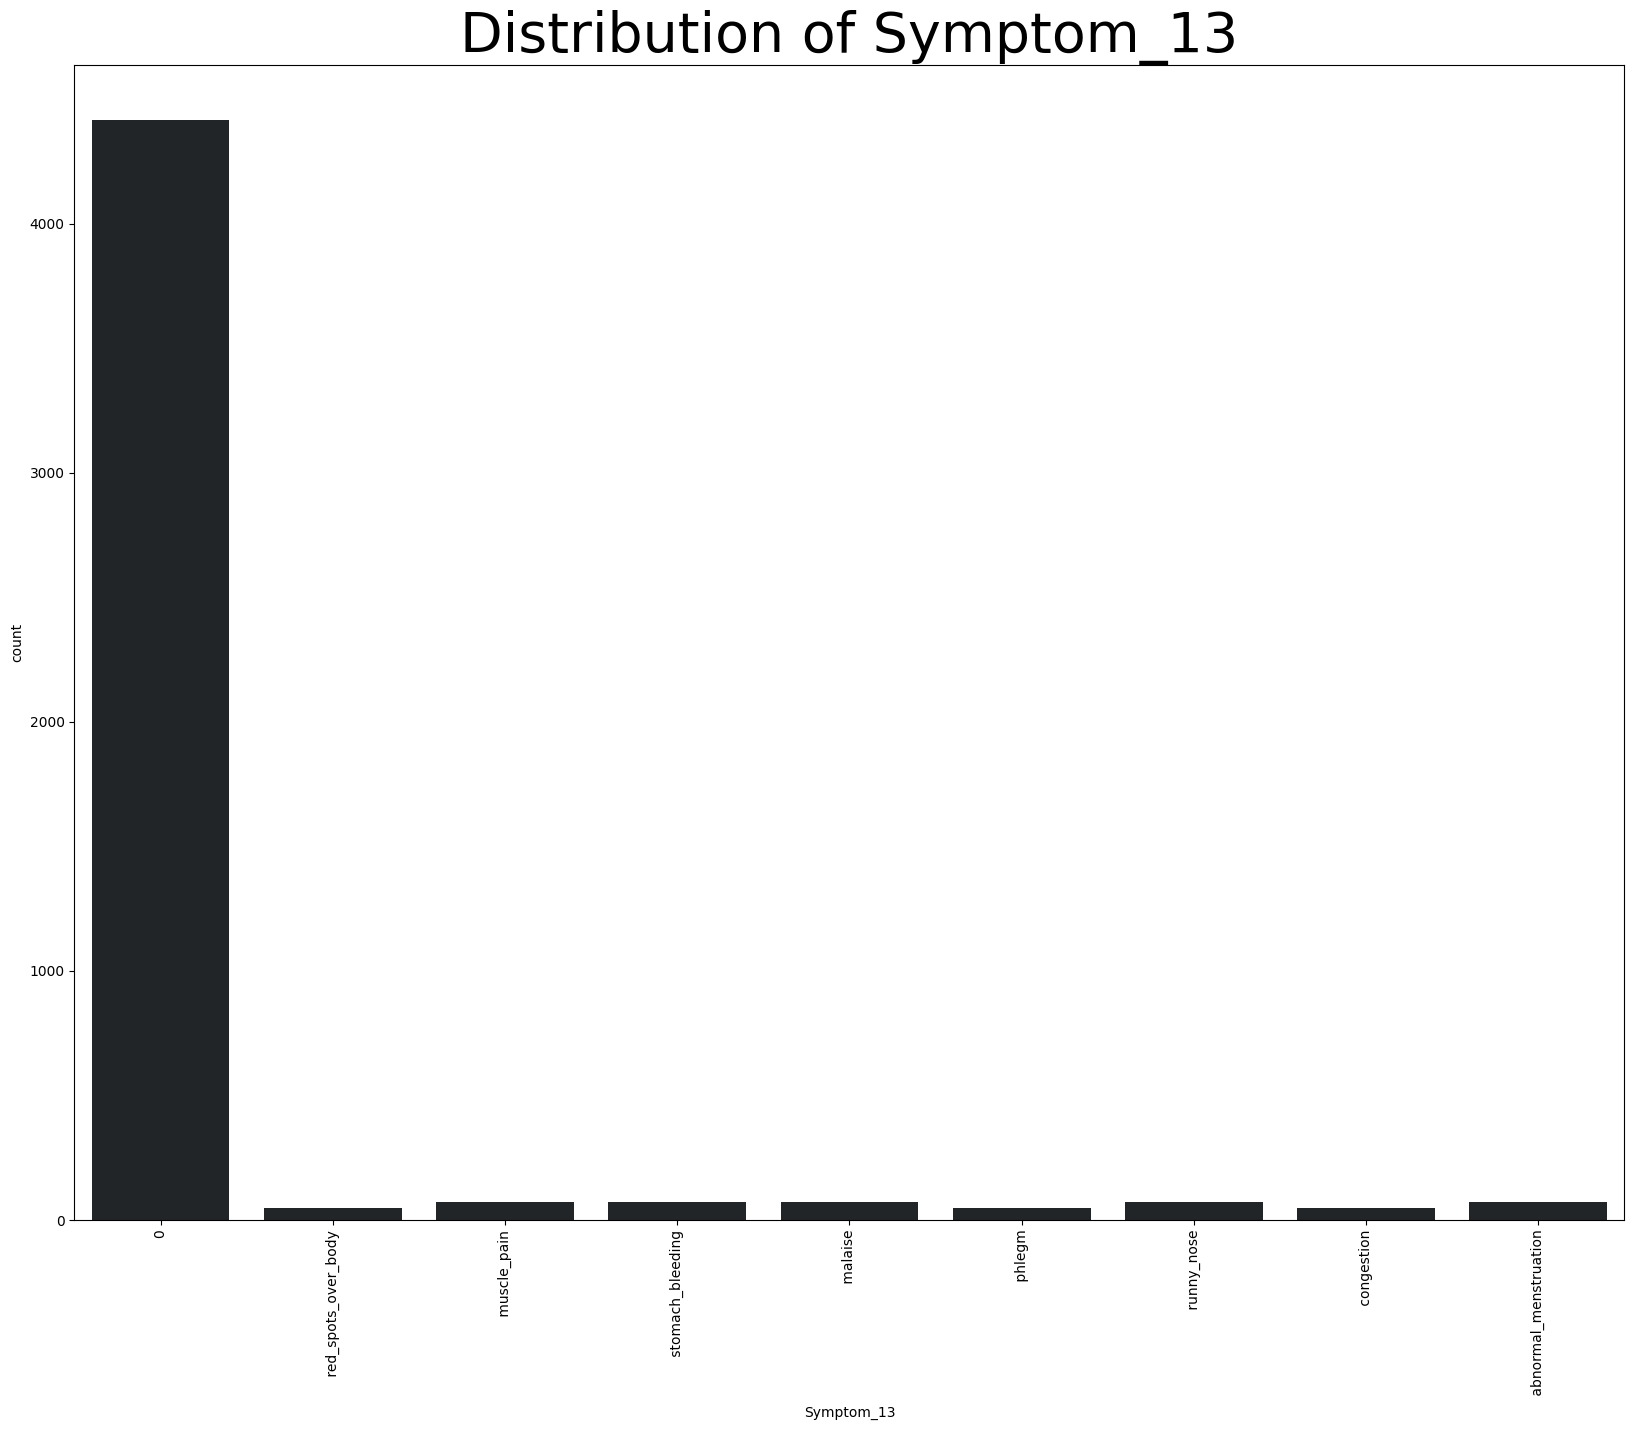

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_13', data=df, color="#212529")
plt.title("Distribution of Symptom_13", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-42-e7e9feb443f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_14', data=df, palette="Purples_d")  # Change to "Purples_d"


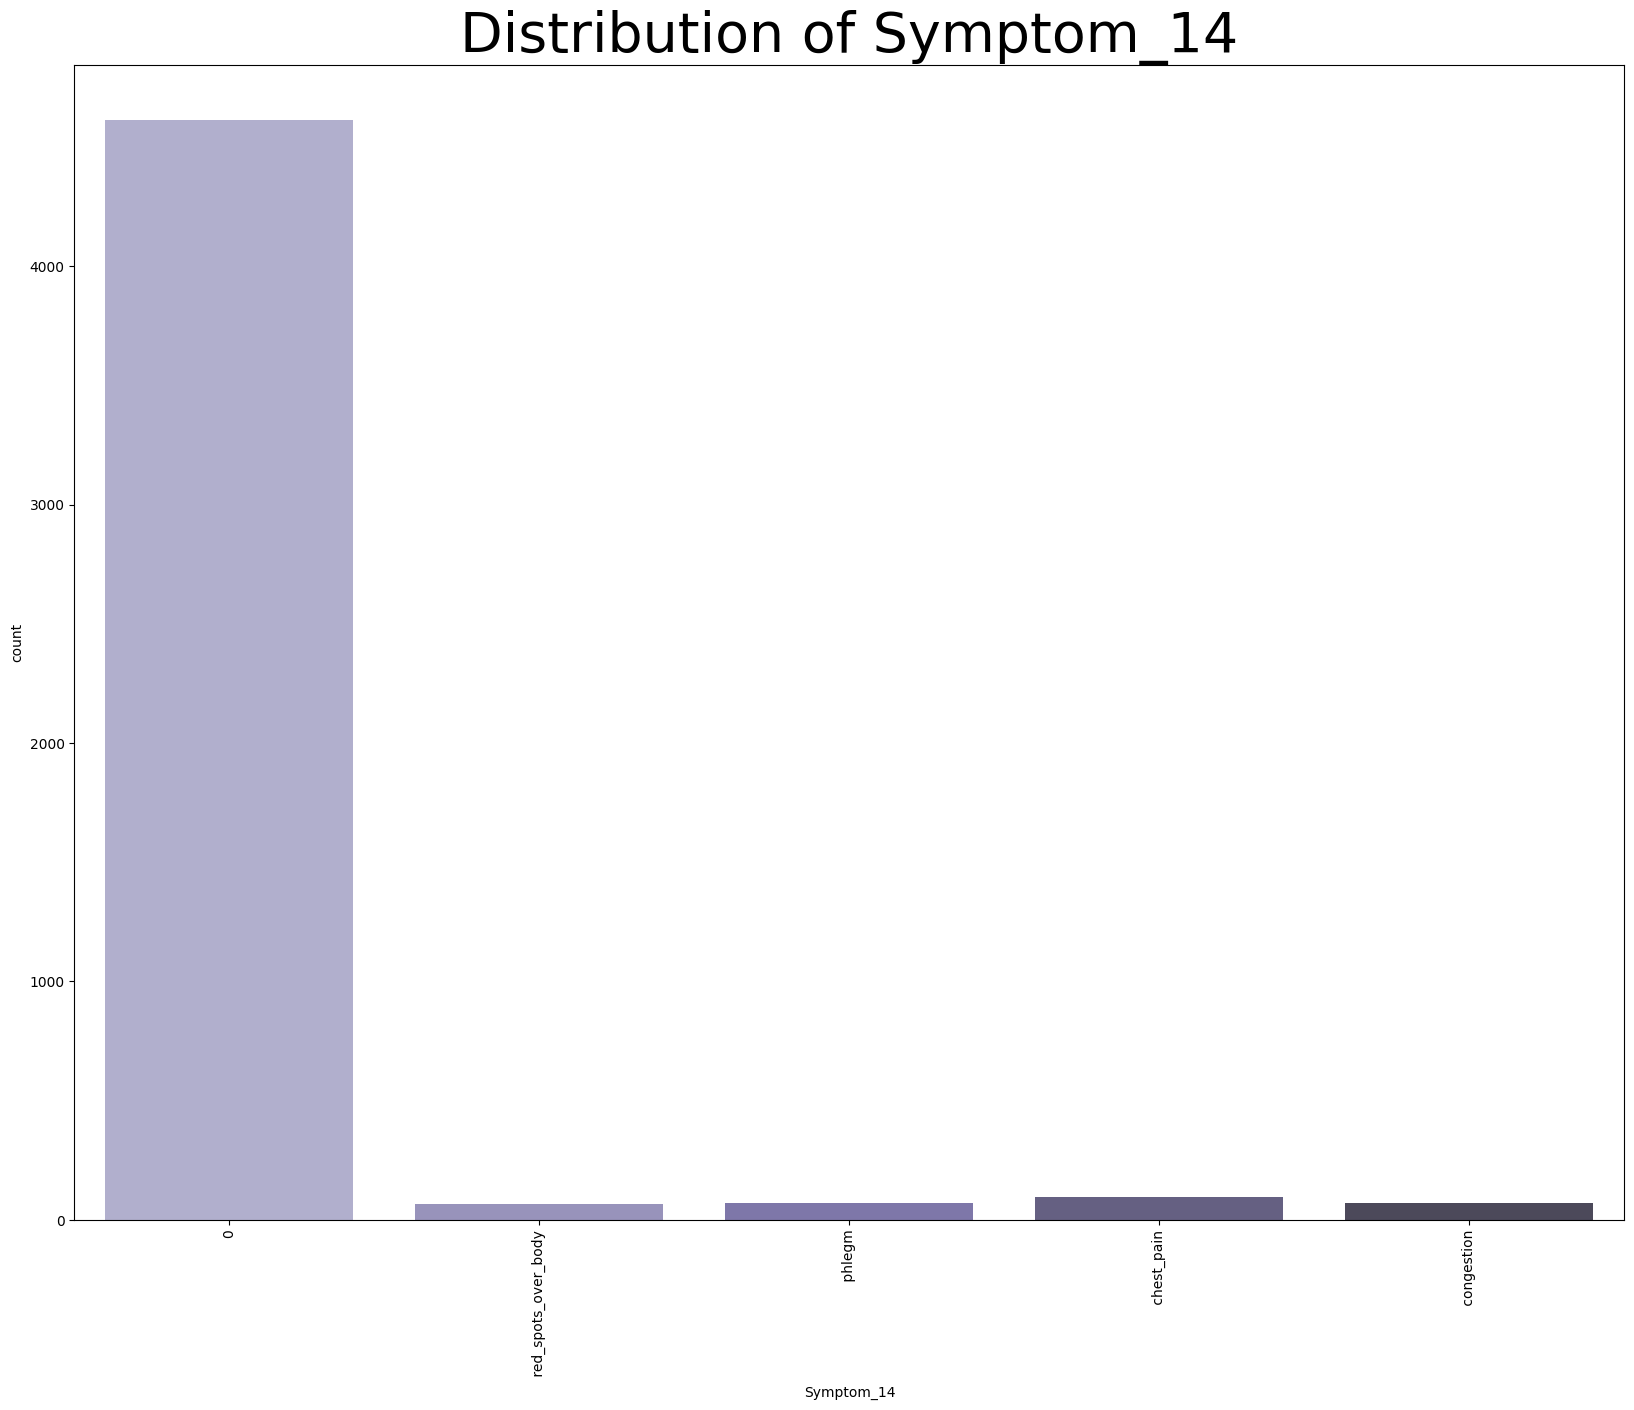

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_14', data=df, palette="Purples_d")
plt.title("Distribution of Symptom_14", fontsize=40)
plt.xticks(rotation=90)
plt.show()

<ipython-input-43-2430db63014d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Symptom_15', data=df, palette="Purples_d")  # Change to "Purples_d"


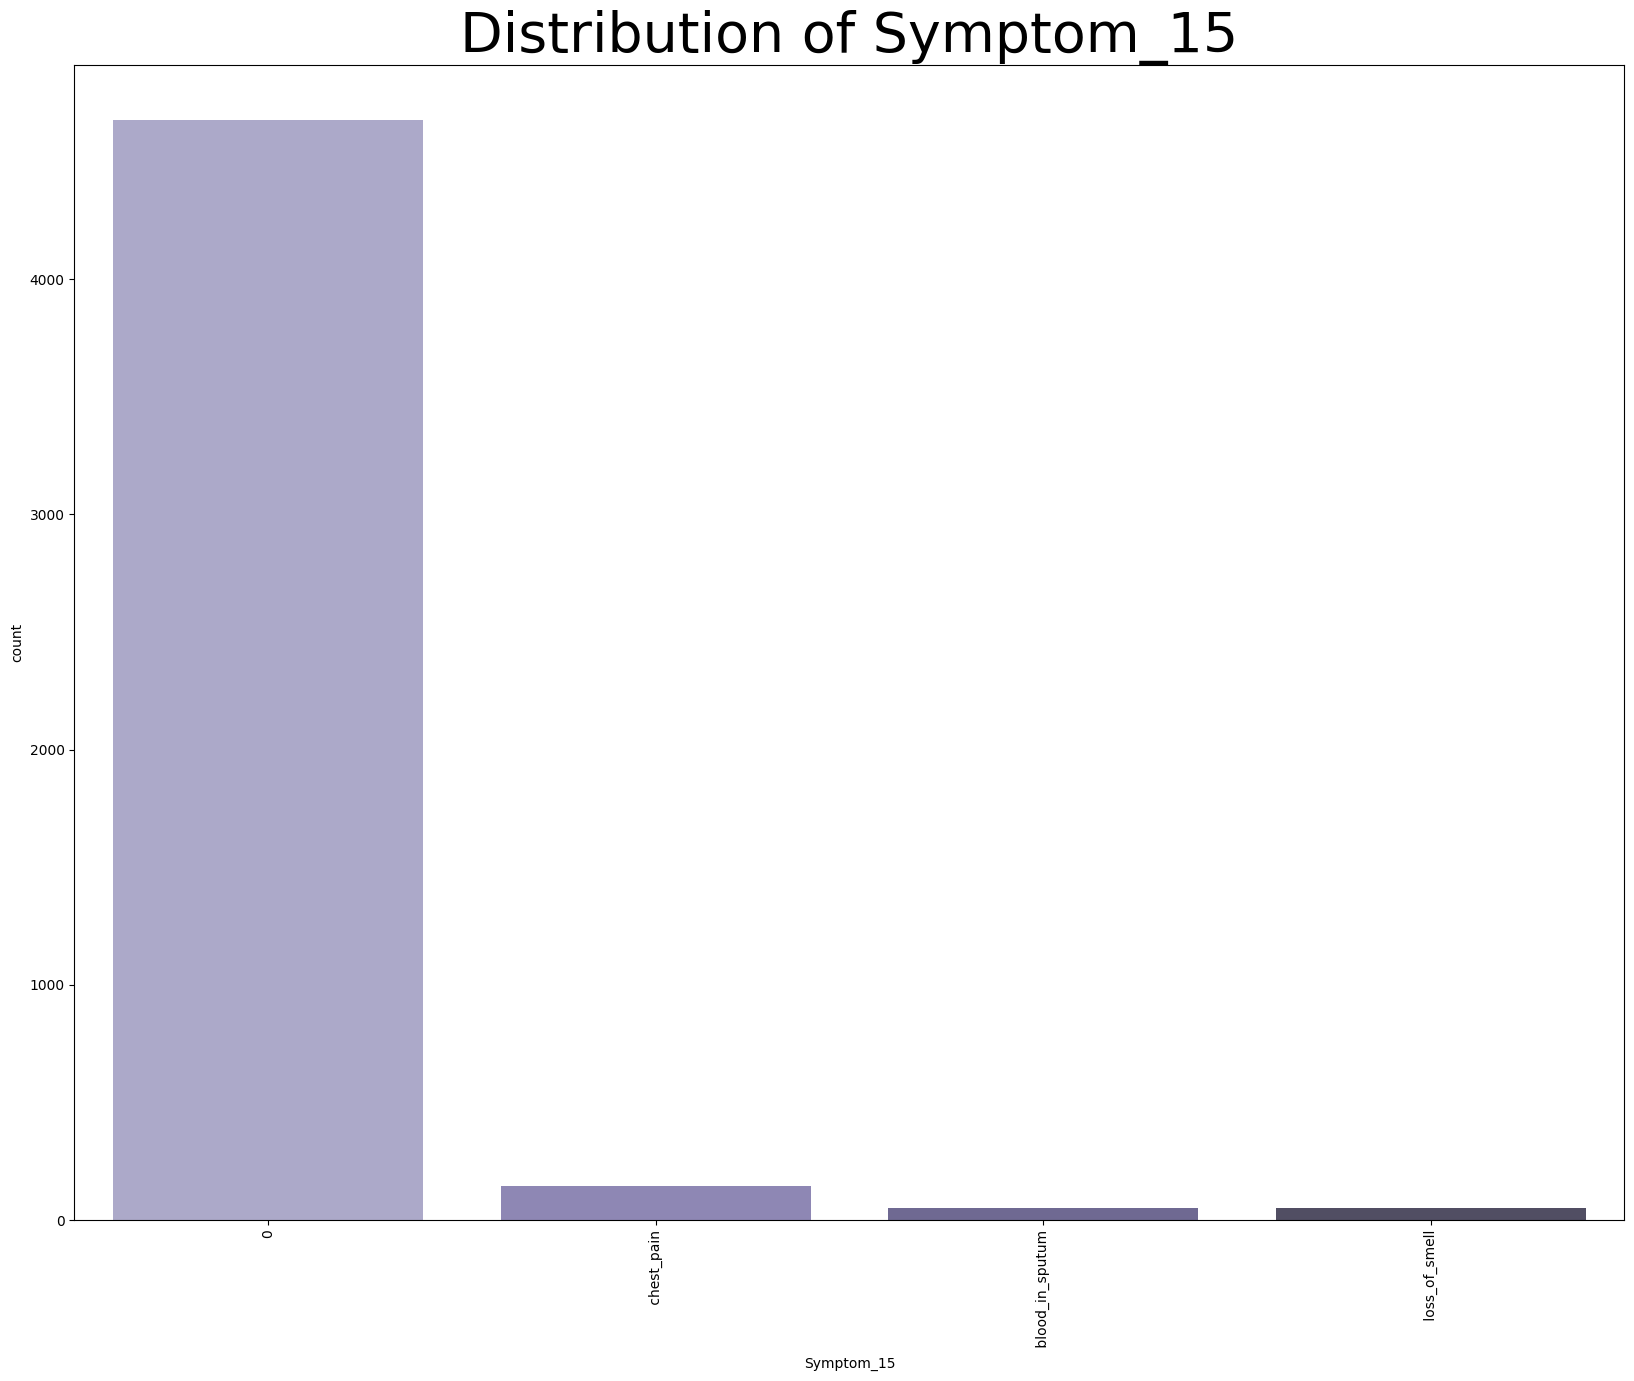

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_15', data=df, palette="Purples_d")
plt.title("Distribution of Symptom_15", fontsize=40)
plt.xticks(rotation=90)
plt.show()

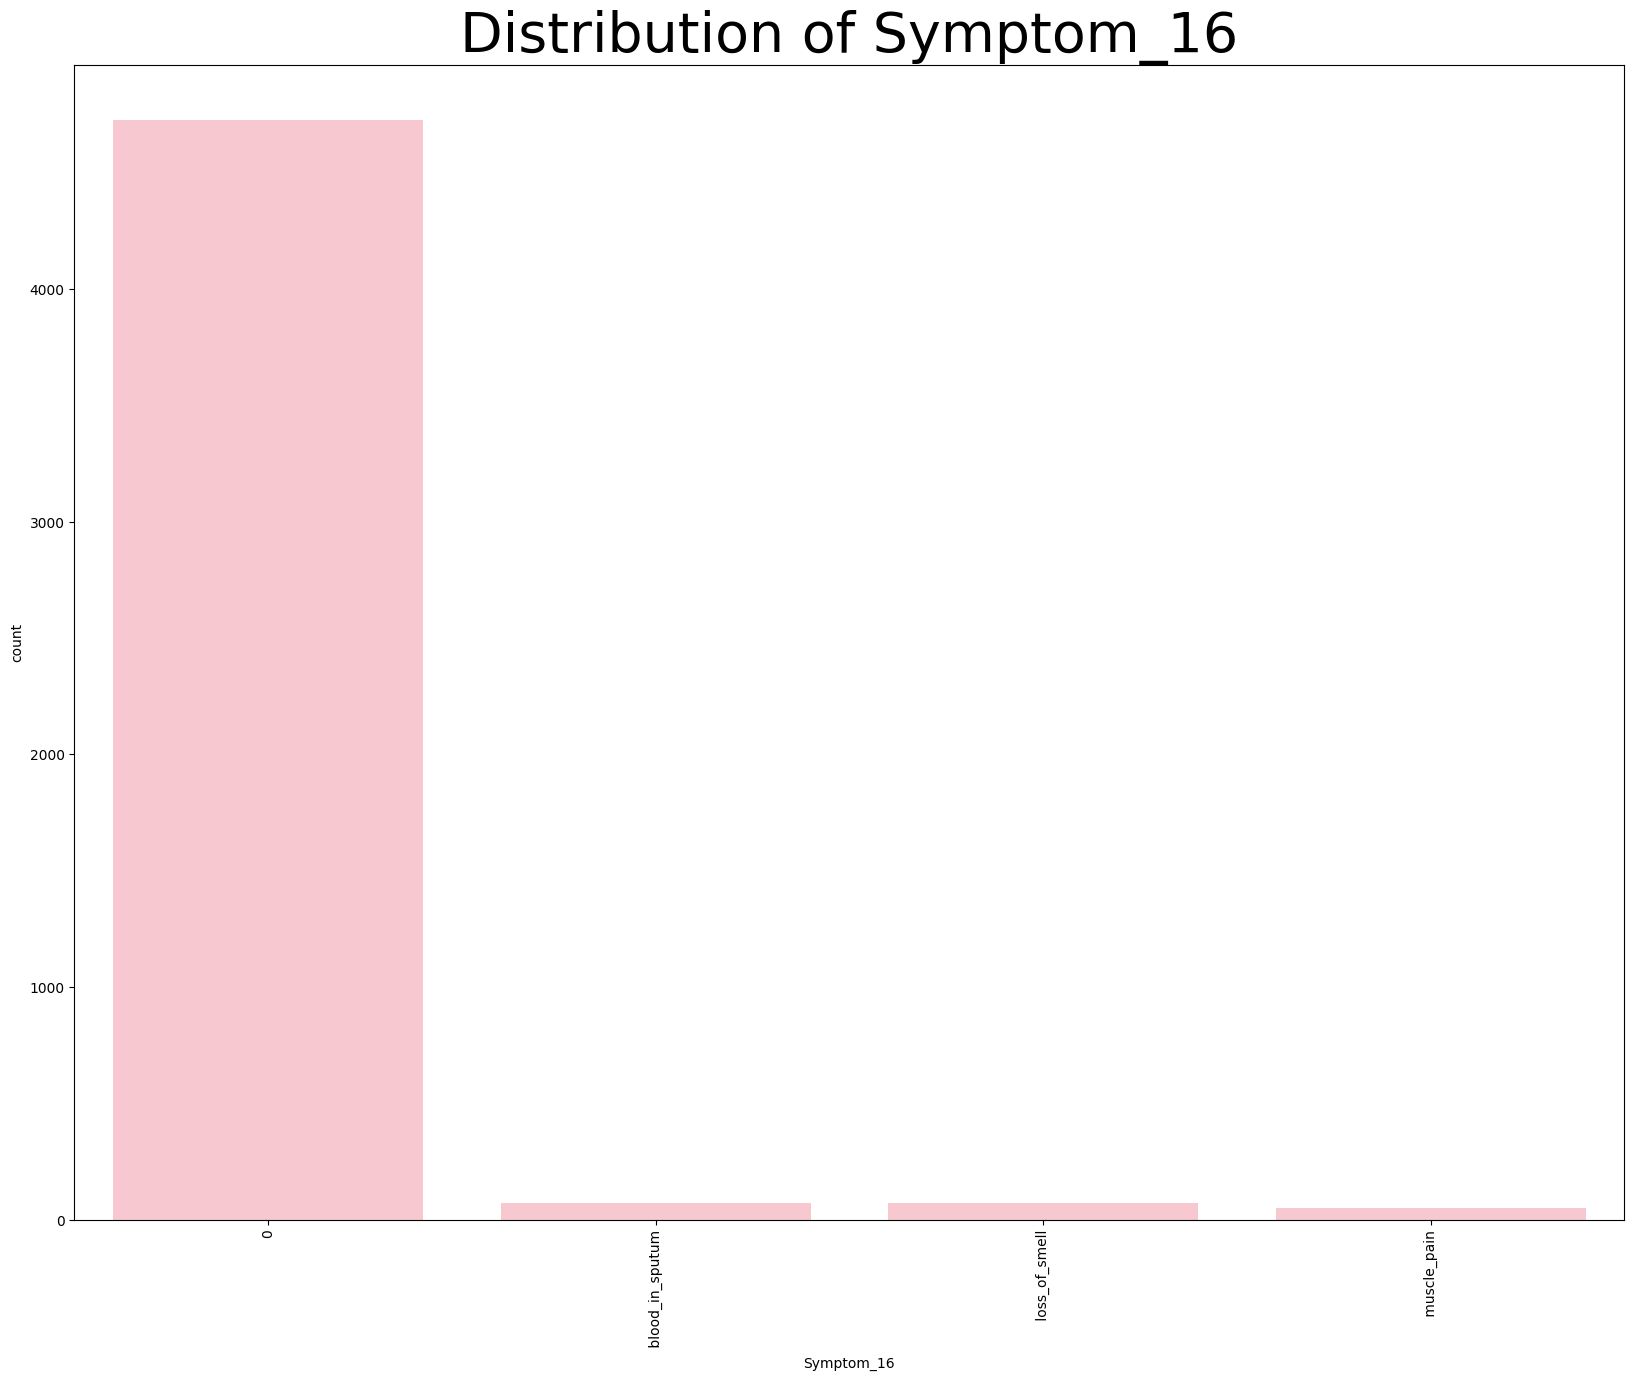

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_16', data=df, color="pink")
plt.title("Distribution of Symptom_16", fontsize=40)
plt.xticks(rotation=90)
plt.show()

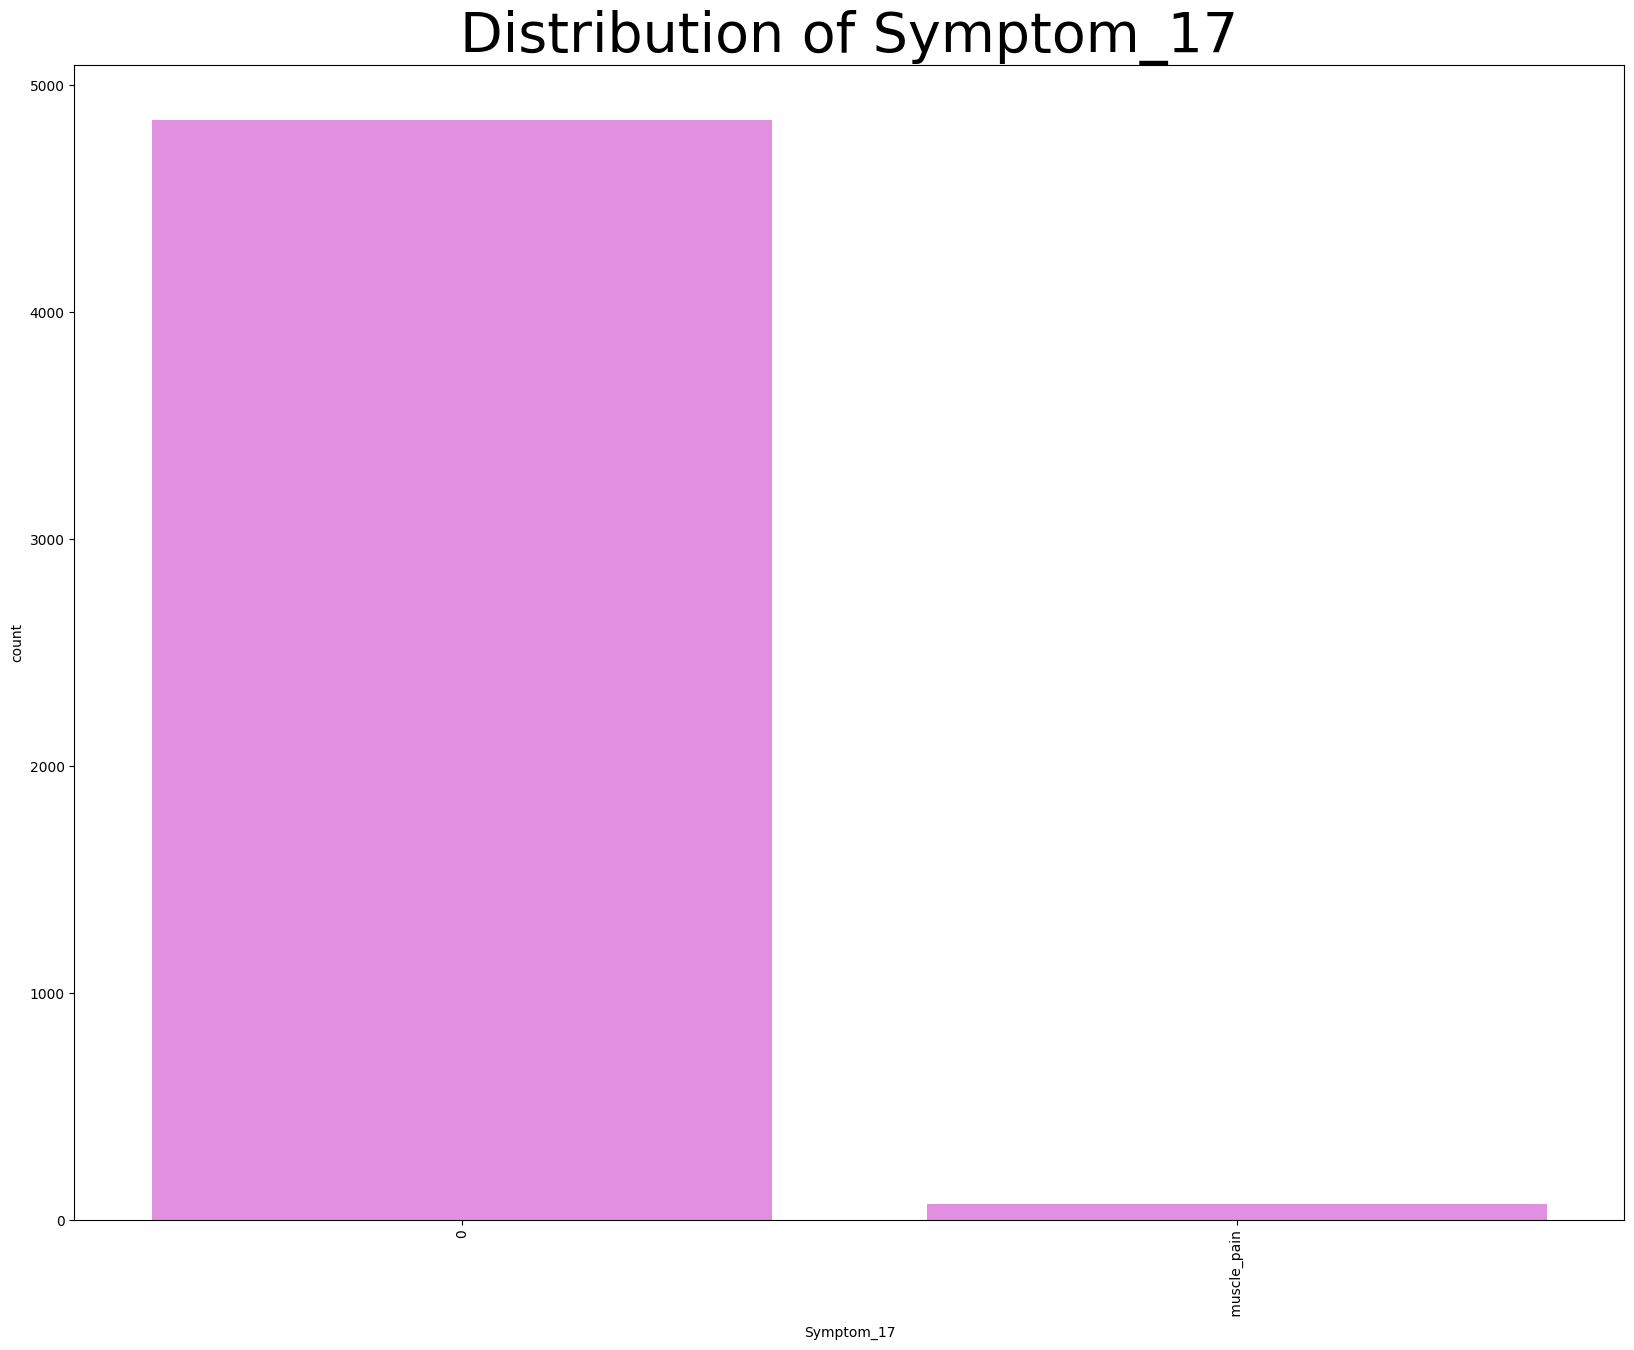

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Symptom_17', data=df, color="violet")
plt.title("Distribution of Symptom_17", fontsize=40)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# DataFrame containing the categorical data
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column's data type is object
    if df[column].dtype == object:
        # Convert all values in the column to strings before encoding
        df[column] = df[column].astype(str)
        # Fit and transform the column using the LabelEncoder
        df[column] = le.fit_transform(df[column])

In [ ]:

# Logistic Regression Accuracy for the dataset give this accuracy in percentage

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 'Disease' is the target variable
X = df.drop('Disease', axis=1)
y = df['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions) * 100
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

SVM Accuracy: 96.95%


In [ ]:
from sklearn.metrics import classification_report

#classification report
svm_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:\n", svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      1.00      1.00        30
           2       0.87      0.83      0.85        24
           3       1.00      1.00      1.00        25
           4       0.92      0.96      0.94        24
           5       1.00      1.00      1.00        23
           6       1.00      0.97      0.98        33
           7       1.00      0.87      0.93        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       0.95      0.88      0.91        24
          15       0.80      0.84      0.82        19
          16       1.00      1.00      1.00        28

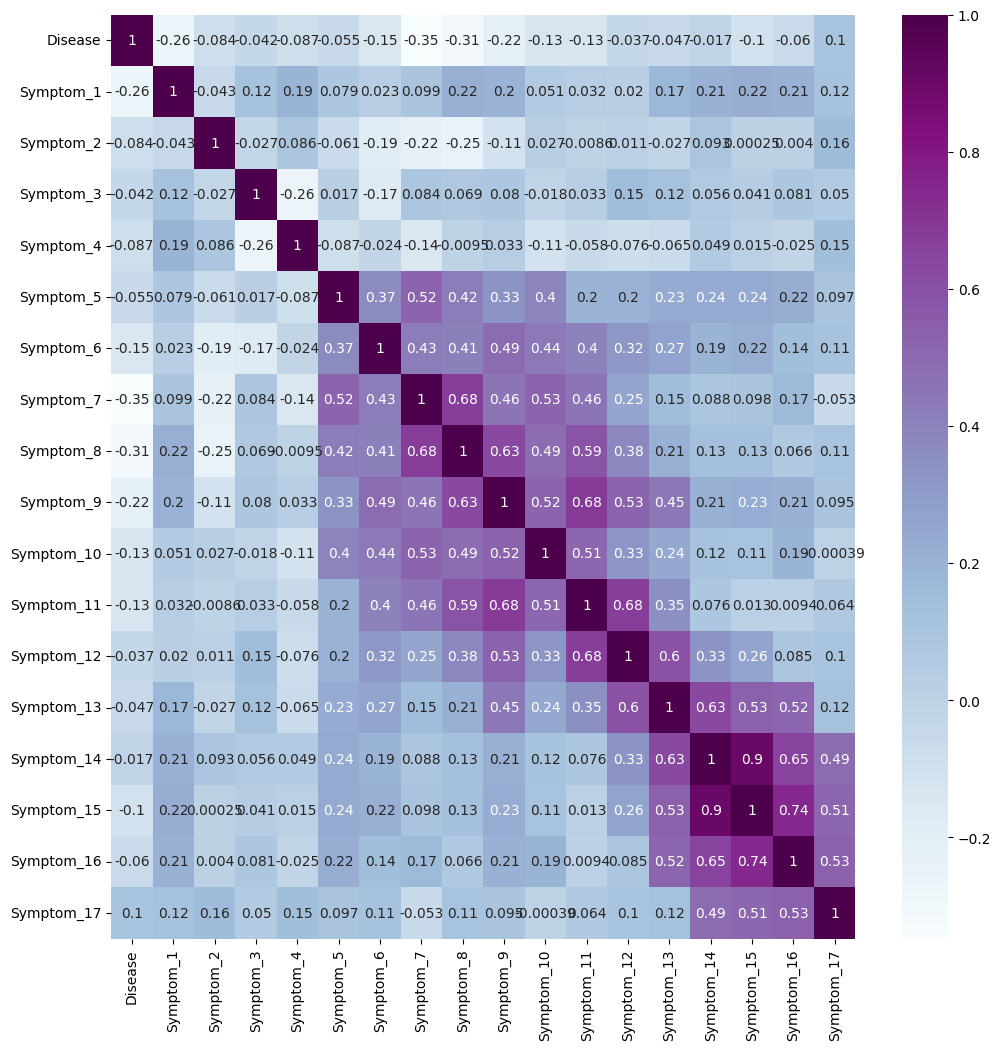

In [ ]:
# For the correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson'), cbar=True, cmap='BuPu', annot=True)
plt.show()